In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, brier_score_loss,confusion_matrix, average_precision_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_score,recall_score
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm, metrics
#from sklearn.externals.six import StringIO 
from IPython.display import Image 
#from pydot import graph_from_dot_data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import statsmodels.api as sm
import statsmodels as sm1

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import pprint
import math

import seaborn as sn
from sklearn.impute import MissingIndicator

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier


In [3]:
def missingcount(datatocount, columnnames =[], to_print = 0):
    if len(columnnames)==0: columnnames = datatocount.columns
    nn = len(datatocount)
    missingdf = pd.DataFrame(columns = ['column_name', 'percentage_missing', 'count_missing', 'count_filled', 'count_all'])
    if to_print ==1: print ('Missing values count by column: \nCount\percentage\column name')
    i=0
    for c in columnnames:
        mv = sum(datatocount[c].isna())
        if to_print ==1: print (mv, 'out of', nn, round(100.* mv/nn,2),'%_', c, '_' )
        missingdf.loc[i] = [c] + [str(round(100.* mv/nn,3))] + [mv] + [nn-mv]+[nn]
        i+=1
    return missingdf

In [3]:
df = pd.read_csv('Data_2_processed_24Apr21.csv')

C:\Users\dinab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,126,127,128,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.shape

In [ ]:
df_smi = df[df.smi==1]

In [ ]:
df_smi.shape

In [4]:
del(df)

In [ ]:
dict_smoke_ever = {"Never smoked tobacco":0,"Cigarette smoker":1,"Ex smoker":1,"Thinking about stopping smoking":1,"Current smoker":1,"Not interested in stopping smoking":1,"Stopped smoking":1,"Rolls own cigarettes":1,"Current non-smoker":0,"Trying to give up smoking":1,"Ready to stop smoking":1,"Ex-cigarette smoker":1,"Light smoker - 1-9 cigs/day":1,"Non-smoker":0,"Chews tobacco":1,"Moderate smoker - 10-19 cigs/d":1,"Ex-moderate smoker (10-19/day)":1,"Ex-light smoker (1-9/day)":1,"Cigar smoker":1,"Ex-smoker - amount unknown":1,"Ex-trivial smoker (<1/day)":1,"Ex-heavy smoker (20-39/day)":1,"Trivial smoker - < 1 cig/day":1,"Cigarette consumption":1,"Heavy smoker - 20-39 cigs/day":1,"Ex-Cigarette Smoker":1,"0 a day":0,"Occasional smoker":1,"Pipe smoker":1,"Date ceased smoking":1,"I have never smoked":0,"I used to smoke but have given up":1,"Total time smoked":1,"Ex-very heavy smoker (40+/day)":1,"Recently stopped smoking":1,"Ex cigar smoker":1,"1-9 a day":1,"Passive smoker":0,"Current Smoker NOS":1,"Not Interested In Quiting":1,"Ex- Rolled Tobacco Smoker":1,"Smoking reduced":1,"Very heavy smoker - 40+cigs/d":1,"Smoking Clinic":1,"Keeps trying to stop smoking":1,"Thinking About Not Smoking":1,"Failed attempt to stop smoking":1,"Quit Tobacco":1,"Tobacco consumption NOS":1,"Smoker":1,"Minutes from waking to first tobacco consumption":1,"10-19 a day":1,"Smokes 0 /day":0,"Ex roll-up cigarette smoker":0,"Tobacco consumption":1,"Smoking restarted":1,"Cigarette pack-years":1,"Refusal to give smoking status":1,"Never Smoked Tobacco":1,"Smoking started":1,"40 + a day":1,"Ex-Light Smoker (1-9/day)":1,"20-39":1,"I currently smoke":1,"Ex pipe smoker":1,"Smoking increased":1,"Cigarette Smoker":1,"Not a passive smoker":1,"Smoker - amount smoked":1,"Tobacco consumption unknown":1,"Ex-tobacco chewer":1,"Waterpipe tobacco consumption":1,"Ex-Moderate Smoker (10-19/day)":1,"No.Cigars Smoked 0 /day":0,"Quiting / Cutting Down Tobacco":1,"Preparing To Quit Tobacco":1,"Current Smoker":1,"Reason for restarting smoking":1,"Smoking clinic":1,"Chews Tobacco":1,"Date ceased Smoking":1}
df_smi["smoke_ever"]=np.nan
df_smi["smoke_ever"]=df_smi["smoketerm"].replace(dict_smoke_ever)

In [ ]:
df_smi.columns[100:120]

In [ ]:
df_smi.ethnic2.value_counts(dropna=0)

In [ ]:
#https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups
ethnicity_2011 = {"Bangladeshi":"Asian_B",
                  "Pakistani":"Asian_P",
                  "Indian":"Asian_I",
                  "other Asian": "Asian_CO", 
                  "Chinese":"Asian_CO",
                  
                  "white British": "White", 
                  "Irish":"White", 
                  "other white":"White",
                  
                  "other black":"Black_O",
                  "black African":"Black_A", 
                  "black Caribbean":"Black_C",
                  
                  "other ethnic group":"Other",
                  "mixed ethnicity": "Mixed"
                 }

ethnicity_2011_5 = {"Bangladeshi":"Asian",
                  "Pakistani":"Asian",
                  "Indian":"Asian",
                  "other Asian": "Asian", 
                  "Chinese":"Asian",
                  
                  "white British": "White", 
                  "Irish":"White", 
                  "other white":"White",
                  
                  "other black":"Black",
                  "black African":"Black", 
                  "black Caribbean":"Black",
                  
                  "other ethnic group":"Other",
                  "mixed ethnicity": "Mixed"
                 }
                 
df_smi["ethnic_2011"] = df_smi["ethnic2"].replace(ethnicity_2011)
df_smi["ethnic_2011_5"] = df_smi["ethnic2"].replace(ethnicity_2011_5)

In [ ]:
df_smi["ethnic_2011"].value_counts(dropna=0)

In [ ]:
df_smi["ethnic_2011_5"].value_counts(dropna=0)

In [ ]:
depr_new = {"Anxiety with depression":1,"[X]Depression NOS":1,"Depressive disorder NEC":1,"Depression":1,"[X]Moderate depressive episode":1,"[X]Depressive episode":1,"[X]Mild depressive episode":1,"Chronic depression":1,"[X]Depressive episode, unspecified":1,"[X] Reactive depression NOS":1,"Depression NOS":1,"[X]Severe depressive episode without psychotic symptoms":1,"Depression resolved":1,"Recurrent depression":1,"[X]Mixed anxiety and depressive disorder":1,"[X]Mild depression":1,"Endogenous depression":1,"Agitated depression":0,"[X]Depressive episode, unspecf (GMS)":1,"[X]Severe depressive episode with psychotic symptoms":0,"[X]Mild anxiety depression":1,"[X]Dysthymia":1,"[X]Depressive disorder NOS":1,"Psychotic reactive depression":0,"Single major depressive episod":1,"Single major depressive episode":1,"Recurrent major depressive episode":1,"Reactive depressive psychosis":0,"Single major depressive episode, unspecified":1,"[X]Neurotic depression":1,"[X]Recurr major depr ep, severe with psych, psych in remiss":0,"Moderate depression":1,"DEPRESSION":1,"Seasonal affective disorder":1,"Prolonged depressive reaction":1,"Endogenous depression first episode":1,"Endogenous depression - recurrent":1,"Severe depression":1,"Single major depressive episode, moderate":1,"Single major depressive episode, severe, without psychosis":1,"[X]Other depressive episodes":1,"[X]Schizoaffective disorder, depressive type":0,"Single major depressive episode, mild":1,"Single major depressive episode, severe, with psychosis":0,"[X]Major depression, severe with psychotic symptoms":0,"Single major depressive episode NOS":1,"Recurrent major depressive episodes, severe, with psychosis, psychosis in remission":0,"Mild depression":1,"[X]Major depression, moderately severe":1,"Recurrent major depressive episodes, severe, no psychosis":1,"Endogenous depression - first":1,"[X]Moderate depressve episode (GMS)":1,"[X]Major depression, severe without psychotic symptoms":1,"[X]Single episode of reactive depression":1,"Recurrent major depressive episodes, moderate":1,"[X]Persistant anxiety depress":1,"Recurrent major depressive episode NOS":1,"[X]Depressive neurosis":1,"[X]Depressive episode, unspecf":1,"Recurrent major depressive epi":1,"Recurrent major depressive episodes, mild":1,"Recurrent major depressive episodes, unspecified":1,"Masked depression":1,"Recurrent major depressive episodes, severe, with psychosis":0,"[X]Atypical depression":1,"Atypical depressive disorder":0,"Postviral depression":1,"[X]Severe depressive + psychot (GMS)":0,"[X]Single episode of psychotic depression":0,"Endogenous depression first":1,"[X]Persistant anxiety depression":1,"[X]Severe depressiv no psychot (GMS)":1,"Endogenous depression-recurr.":1,"Single major depressive episod (GMS)":1,"Endogenous Depression":1,"[X]Schizophren psychos,depress":0,"depression":1,"Premenstrual dysphoric disorder":1,"Single major depressive episode, partial or unspec remission":1,"[X]Prolonged single episode of reactive depression":1,"Mixed anxiety and depressive disorder (GMS)":1,"[X]Schizoaffect psychos,depres":0,"[X]Single episode major depression w'out psychotic symptoms":1,"[X]Major depression, mild":1,"Senile dementia + depression":1,"[X]Sngl episd/reactive depresn":1,"Recurr.major depress.-moderate (GMS)":1,"Recurrent major depressive epi (GMS)":1,"Anxiety & Depression":1,"Single maj.depress.severe+psyc":0,"Mild depression (GMS)":1,"[X]Post-schizophrenic depression":1,"Senile dementia with depression":1,"[X]Sgl epi,maj depres+psyc sym":0,"[X]Single epis/psychog depress":1,"Recurr.major depression-severe (GMS)":1,"[X]Single episode of major depression and psychotic symptoms":0,"Depression NOS and similar probs as above.Step":1,"Single major depress.-moderate (GMS)":1,"Test request: Anxiety with depression":1,"[X]Single episode of psychogenic depressive psychosis":0,"[X]Mixed anxiety/depressve dis (GMS)":1,"CONSULTATION:Depression":1,"Single major depress.-moderate":1,"Depression Quality Indicators v19.0.00":1,"Query [X] Reactive depression NOS":1,"[X]Depressive personality disorder":1,"[X]Sngl episod/psychot depress":0,"Presenile dementia with depression":1,"Recurr.major depression-mild (GMS)":1,"Query Depressive disorder NEC":1,"[X]Single episode of psychogenic depression":1,"[X]Severe depressive + psychot":0,"Antenatal depression":1,"[X]Single episode agitated depressn w'out psychotic symptoms":1,"[X]Single major depr ep, severe with psych, psych in remiss":1,"[X]Mild depressive episode 2002":1,"Query [X]Depression NOS":1,"Depression NOS tearful and low mood pre xmas.":1,"Depressed Mood":1,}

df_smi["depr_new"] = df_smi["depressionterm"].replace(depr_new)

In [ ]:
df_smi["n3_5"] = df_smi["n3"]+df_smi["n4"]+df_smi["n5"]
df_smi["age_bmi_"]= df_smi["age_"]*df_smi["bmi_"]

In [ ]:
df_smi["age_APM"]= df_smi["age_"]*df_smi["APM"]

In [ ]:
df_smi["White"] = [1 if x=="White" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Asian_Bangladeshi"] = [1 if x=="Asian_B" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Asian_Indian"] = [1 if x=="Asian_I" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Asian_Pakistani"] = [1 if x=="Asian_P" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Asian_other"] = [1 if x=="Asian_CO" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Black_Caribbean"] = [1 if x=="Black_C" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Black_African"] = [1 if x=="Black_A" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Black_Other"] = [1 if x=="Black_O" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Other"] = [1 if x=="Other" else 0 for x in df_smi["ethnic_2011"]]
df_smi["Mixed"] = [1 if x=="Mixed" else 0 for x in df_smi["ethnic_2011"]]

ethnicities = ["White", "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
              "Asian_other", "Black_Caribbean", "Black_African" , "Black_Other" , "Other", "Mixed"]

In [ ]:
df_smi[ethnicities].sum()

In [ ]:
#keep SMI-only copy of the original data
df_smi.to_csv("Data_2_processed_24Apr21_SMI.csv")

## start here

In [4]:
df_smi = pd.read_csv("Data_2_processed_24Apr21_SMI.csv")

In [5]:
imputing_set = ['age_', 'age_2', 'ln_age_', 'gender', 'smi_schiz', 'smi_bipolar', 'APM',
                 "White", "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
              "Asian_other", "Black_Caribbean", "Black_African" , "Black_Other" , "Other", "Mixed",
                   'bmi_','ln_bmi_', 'n1', 'n2', 'n3_5','cvd','strokedum','hfdum','ckddum','hypdum',
                   'D_binary', 'asthmadum', 'depressiondum', 'depr_new', "smoke_ever"]  #smi, e0, n1

In [97]:
ethnic_list = [ 'Asian_Bangladeshi', 'Asian_Indian',
       'Asian_Pakistani', 'Asian_other', 'Black_Caribbean', 'Black_African',
       'Black_Other', 'Other', 'Mixed', 'White']

risk_factors = [ 'age_', 'age_2', 'gender', 'bmi_', 'age_bmi_','cvd','hypdum', 
                "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
                 "Asian_other", "Black_Caribbean", "Black_African" , 
                 "Black_Other" , "Other", "Mixed",
                 'n2', 'n3_5', 'smi_schiz', 'APM' , 'age_APM','depressiondum'] 

In [7]:
missingcount(df_smi, imputing_set)

,column_name,percentage_missing,count_missing,count_filled,count_all
0,age_,0.0,0,10159,10159
1,age_2,0.0,0,10159,10159
2,ln_age_,0.0,0,10159,10159
3,gender,0.0,0,10159,10159
4,smi_schiz,0.0,0,10159,10159
5,smi_bipolar,0.0,0,10159,10159
6,APM,0.0,0,10159,10159
7,White,3.731,379,9780,10159
8,Asian_Bangladeshi,3.731,379,9780,10159
9,Asian_Indian,3.731,379,9780,10159


In [8]:
def demographic_table(df_1):
    dem = pd.DataFrame()
    col_means = ["age", "gender", "bmi_combined", "age_cat", "e0","e1", "e2","e3","e4", "e5","e6",
                 "e7", "e8",  "enon", "D_binary", "cvd", "APM", "smi", "smi_schiz", "smi_bipolar","depr_new", "hypdum"]
    dem['count'] = round(df_1[col_means].sum(),0)
    dem['average'] = round(df_1[col_means].mean(),3)
    dem['std'] = df_1[col_means].std()
    dem.loc["18y-35y", "count"] = sum(df_1.age_cat==0)
    dem.loc["18y-35y", "average"]= np.mean(df_1.age_cat==0)
    dem.loc["18y-35y", "std"]= 0
    dem.loc["35y-55y", "count"]= sum(df_1.age_cat==1)
    dem.loc["35y-55y", "average"]= np.mean(df_1.age_cat==1)
    dem.loc["35y-55y", "std"]= 0
    dem.loc["55y-75y", "count"]= sum(df_1.age_cat==2)
    dem.loc["55y-75y", "average"]= np.mean(df_1.age_cat==2)
    dem.loc["55y-75y", "std"]= 0
    dem.loc["n1", "count"] = sum(df_1.n1==1)
    dem.loc["n2", "count"] = sum(df_1.n2==1)
    dem.loc["n3", "count"] = sum(df_1.n3==1)
    dem.loc["n4", "count"] = sum(df_1.n4==1)
    dem.loc["n5", "count"] = sum(df_1.n5==1)
    dem.loc["smoke_ever", "count"] = sum(df_1.smoke_status==1)
    dem.loc["smoke_ever", "average"] = sum(df_1.smoke_status==1) / (sum(df_1.smoke_status==1) + sum(df_1.smoke_status==0) )
    return dem

demographic_table(df_smi)

In [9]:
def OR_factor(df, factor):
    df1 = df[["D_binary"]+ factor].dropna()
    print (factor, "\n", run_logit(df1["D_binary"], df1, factor))
    return None
def run_logit (y, df, cov, agecat = 'all', ethcat = 'all'):
    sm_model = sm.Logit(y, sm.add_constant(df[cov])).fit(disp=0)# _regularized(disp=0)
    output = sm_model.conf_int()
    output.columns = ['2.5', '97.5']
    output['params'] = round(sm_model.params,5)
    output['pvalues'] = round(sm_model.pvalues,5)
    output['OR'] = round(np.exp(sm_model.params),5)
    output['OR_2.5']= round(np.exp(output['2.5']),5)
    output['OR_97.5']= round(np.exp(output['97.5']),5)
#    output['age_eX']= agecat + '_' + ethcat
    #print ('logit\n', output.loc[['smi']])
    return output

In [10]:
OR_factor(df_smi, ["depressiondum"])

['depressiondum'] 
                     2.5      97.5   params  pvalues       OR   OR_2.5  OR_97.5
const         -1.838571 -1.696479 -1.76753    0.000  0.17076  0.15904  0.18333
depressiondum -0.050372  0.171837  0.06073    0.284  1.06261  0.95088  1.18748


In [11]:
((df_smi.depressiondum==1) & (df_smi.D_binary==1)).sum()

622

# Computing functions 

In [12]:
risk_factors = [ 'age_', 'age_2', 'gender', 
                  'bmi_', 'age_bmi_',
                 'cvd','hypdum', 
                 "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
                 "Asian_other", "Black_Caribbean", "Black_African" , 
                 "Black_Other" , "Other", "Mixed",
                   'n2', 'n3_5', 
                  'smi_schiz', 'APM' , 'age_APM','depressiondum'] 

In [13]:
from sklearn.metrics import make_scorer, f1_score
scaledbrierscore_scorer = make_scorer(brier_score_loss, pos_label=1)
roc_scorer = make_scorer(roc_auc_score)
f1_scorer = make_scorer(f1_score, average = "binary", pos_label=1)


In [14]:
def best_th_pr (y_test, y_predict_proba):
    prec, rec, threshold = precision_recall_curve(y_test, y_predict_proba)
    ind = np.arange(len(rec)-1)
    roc = pd.DataFrame({'rec' : pd.Series(rec[:-1], index=ind),
                        'prec':pd.Series(prec[:-1], index=ind), 
                        'threshold' : round(pd.Series(threshold, index=ind),15)})
    roc['dist'] = roc.prec + roc.rec
    return  roc.threshold[roc.dist.argmax()]

def combine_scorer(clf, X, y):
    y_pred = clf.predict_proba(X)[:,1]
    roc_auc = roc_auc_score(y, y_pred)
    f1_05 = f1_score(y, (y_pred>= 0.5)*1, average = "binary", pos_label=1)
    bs = brier_score_loss(y, y_pred, pos_label=1)
    bs_scaled = r2_score(y, y_pred)
    k_youden = best_th_pr(y, y_pred)
    f1_y = f1_score(y, (y_pred>=k_youden)*1, average = "binary", pos_label=1)
    cm = confusion_matrix(y, (y_pred>=k_youden)*1)
    return {"roc_auc": roc_auc, "f1_05": f1_05, "f1_y":f1_y, 
            "bs":bs, "bs_scaled": bs_scaled,
            'tn': cm[0, 0], 'fp': cm[0, 1],'fn': cm[1, 0], 'tp': cm[1, 1]}

def f1_y(clf, X, y):
    y_pred = clf.predict_proba(X)[:,1]
    k_youden = best_th_pr(y, y_pred)
    f1_y_res = f1_score(y, (y_pred>=k_youden)*1, average = "binary", pos_label=1)
    return f1_y_res

def precision_scorer_y(clf, X, y):
    y_pred = clf.predict_proba(X)[:,1]
    k_youden = best_th_pr(y, y_pred)
    precision_y = precision_score(y, (y_pred>=k_youden)*1, pos_label=1)
    return precision_y

def recall_scorer_y(clf, X, y):
    y_pred = clf.predict_proba(X)[:,1]
    k_youden = best_th_pr(y, y_pred)
    recall_y = recall_score(y, (y_pred>=k_youden)*1, pos_label=1)
    return recall_y

scoring_combined = {"AUC": "roc_auc", "f1_05": make_scorer(f1_score, pos_label=1),
           "bs": make_scorer(brier_score_loss, pos_label=1),"f1_y": f1_y, 
             "precision_y": precision_scorer_y, "recall_y":recall_scorer_y}


In [15]:
def run_logit (y, df, cov, printres = 0, agecat = 'all', ethcat = 'all'):
    sm_model = sm.Logit(y, sm.add_constant(df[cov])).fit(disp=0)# _regularized(disp=0)
    if printres == 1: print (sm_model.summary())
    output = sm_model.conf_int()
    output.columns = ['2.5', '97.5']
    output['params'] = round(sm_model.params,5)
    output['pvalues'] = round(sm_model.pvalues,5)
    output['OR'] = round(np.exp(sm_model.params),5)
    output['OR_2.5']= round(np.exp(output['2.5']),5)
    output['OR_97.5']= round(np.exp(output['97.5']),5)
#    output['age_eX']= agecat + '_' + ethcat
    #print ('logit\n', output.loc[['smi']])
    return output

# Complete cases analysis

In [41]:
df_cc = df_smi[risk_factors+["D_binary"]].dropna()

In [42]:
df_cc.shape

(6462, 23)

In [43]:
df_cc.D_binary.value_counts(normalize=1)

0.0    0.805478
1.0    0.194522
Name: D_binary, dtype: float64

In [44]:
logit_simple = LogisticRegression(penalty = 'none',  max_iter = 300)


In [45]:
logit_scores = cross_validate(logit_simple, df_cc[risk_factors], df_cc["D_binary"], 
                              cv=10,scoring=scoring_combined,return_train_score=False)
logit_scores

{'fit_time': array([0.04388237, 0.03390932, 0.03191447, 0.02792549, 0.03091669,
        0.03690004, 0.03091741, 0.03091741, 0.02892256, 0.02892256]),
 'score_time': array([0.01894903, 0.01396275, 0.01396251, 0.01496053, 0.01496124,
        0.01396251, 0.01396251, 0.0129652 , 0.01396251, 0.01396275]),
 'test_AUC': array([0.83625811, 0.78656735, 0.81265263, 0.82118437, 0.84876374,
        0.81452991, 0.83168498, 0.84409981, 0.8772975 , 0.80403839]),
 'test_f1_05': array([0.37569061, 0.33513514, 0.34972678, 0.37078652, 0.34285714,
        0.31284916, 0.28930818, 0.44086022, 0.54716981, 0.5210084 ]),
 'test_bs': array([0.17465224, 0.19010819, 0.18421053, 0.17337461, 0.17801858,
        0.19040248, 0.1749226 , 0.16099071, 0.14860681, 0.26470588]),
 'test_f1_y': array([0.47082495, 0.36795252, 0.45387454, 0.45220588, 0.50854701,
        0.44202899, 0.50226244, 0.41780822, 0.65505226, 0.39677419]),
 'test_precision_y': array([0.31536388, 0.22627737, 0.29567308, 0.29425837, 0.34795322,
        

In [46]:
run_logit( df_cc["D_binary"],df_cc, risk_factors,1)

                           Logit Regression Results                           
Dep. Variable:               D_binary   No. Observations:                 6462
Model:                          Logit   Df Residuals:                     6439
Method:                           MLE   Df Model:                           22
Date:                Fri, 16 Sep 2022   Pseudo R-squ.:                  0.2401
Time:                        11:04:26   Log-Likelihood:                -2419.5
converged:                       True   LL-Null:                       -3183.9
Covariance Type:            nonrobust   LLR p-value:                2.045e-310
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.4894      0.159    -21.924      0.000      -3.801      -3.177
age_                  1.0401      0.105      9.888      0.000       0.834       1.246
age_2                -0.

,2.5,97.5,params,pvalues,OR,OR_2.5,OR_97.5
const,-3.801311,-3.177415,-3.48936,0.00000,0.03052,0.02234,0.04169
age_,0.833951,1.246278,1.04011,0.00000,2.82954,2.30240,3.47738
age_2,-0.210429,-0.092370,-0.15140,0.00000,0.85950,0.81024,0.91177
gender,-0.240411,0.058448,-0.09098,0.23274,0.91303,0.78630,1.06019
bmi_,0.446002,0.591051,0.51853,0.00000,1.67955,1.56205,1.80589
age_bmi_,-0.147362,-0.058887,-0.10312,0.00000,0.90201,0.86298,0.94281
cvd,0.360215,0.969917,0.66507,0.00002,1.94462,1.43364,2.63773
hypdum,0.831125,1.158806,0.99497,0.00000,2.70463,2.29590,3.18613
Asian_Bangladeshi,2.004602,2.445331,2.22497,0.00000,9.25317,7.42314,11.53436
Asian_Indian,0.760738,1.376767,1.06875,0.00000,2.91174,2.13986,3.96207


logit_scores_1 = cross_validate(logit_simple, df_cc[risk_factors], df_cc["D_binary"], 
                              cv=10,scoring=("roc_auc", "f1", "f1_macro", "f1_micro"),
                                return_train_score=False)
logit_scores_1

#### GBM

##### tune GBM

In [47]:
gbm_start = HistGradientBoostingClassifier(max_iter=100, min_samples_leaf=5, learning_rate = 0.05, max_depth = 20)
grid_gbm = {'min_samples_leaf' : [20,30,50,70], 'learning_rate': [0.02, 0.1], 'max_depth':[3,4,7]}

In [48]:
optim_model = GridSearchCV(gbm_start, grid_gbm, n_jobs = 4, cv = 3, 
                           scoring = ['roc_auc', 'average_precision'], 
                           refit = 'roc_auc', return_train_score = 0)

optim_model.fit(df_cc[risk_factors], df_cc["D_binary"])
print (optim_model.best_estimator_, optim_model.best_params_)
print ('mean test Average precision', optim_model.cv_results_['mean_test_average_precision'])
print ('mean test ROC AUC', optim_model.cv_results_['mean_test_roc_auc'])

HistGradientBoostingClassifier(max_depth=3) {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 20}
mean test Average precision [0.51841253 0.51778178 0.51806872 0.52051596 0.52544851 0.52198108
 0.52199998 0.52204623 0.51526539 0.50716504 0.51915893 0.51638186
 0.53869144 0.52961969 0.53273385 0.53738857 0.53408246 0.52520196
 0.52385058 0.53053917 0.50370589 0.49935991 0.51278737 0.51388888]
mean test ROC AUC [0.81375353 0.81270763 0.8122154  0.81207944 0.81619473 0.81455916
 0.81548241 0.81560781 0.81403392 0.81170483 0.81448327 0.81419555
 0.8247403  0.82179908 0.82301028 0.82394636 0.81958141 0.81957935
 0.81928291 0.82211615 0.80237013 0.80313564 0.80819572 0.81255127]


In [49]:
#optimal gbm object
gbm_optim = HistGradientBoostingClassifier(max_depth=3, min_samples_leaf=70, learning_rate= 0.1)


##### cross-validate gbm

In [50]:
gbm_scores = cross_validate(gbm_optim, df_cc[risk_factors], df_cc["D_binary"], 
                              cv=10,scoring=scoring_combined,
                              return_train_score=False)
gbm_scores

{'fit_time': array([0.12865448, 0.14561224, 0.10970664, 0.11369634, 0.11070395,
        0.10771155, 0.10471964, 0.12865543, 0.12865329, 0.10671449]),
 'score_time': array([0.02792549, 0.02293658, 0.0249331 , 0.02194095, 0.02293849,
        0.03091693, 0.02194166, 0.0249331 , 0.0289228 , 0.02593136]),
 'test_AUC': array([0.83648661, 0.78120525, 0.80296093, 0.81485806, 0.85009921,
        0.81849817, 0.82717491, 0.83777351, 0.86221881, 0.79289827]),
 'test_f1_05': array([0.39325843, 0.32402235, 0.29714286, 0.37078652, 0.41340782,
        0.34682081, 0.30573248, 0.43478261, 0.54807692, 0.49425287]),
 'test_bs': array([0.16692427, 0.187017  , 0.19040248, 0.17337461, 0.1625387 ,
        0.1749226 , 0.16873065, 0.16099071, 0.14551084, 0.27244582]),
 'test_f1_y': array([0.57303371, 0.37878788, 0.46575342, 0.43432574, 0.54457831,
        0.46987952, 0.48421053, 0.4352518 , 0.63900415, 0.38167939]),
 'test_precision_y': array([0.44347826, 0.2340824 , 0.30909091, 0.27865169, 0.39100346,
        

In [54]:
#supplementary table a
pd.DataFrame(gbm_scores).describe().to_clipboard()
pd.DataFrame(gbm_scores).describe()

,fit_time,score_time,test_AUC,test_f1_05,test_bs,test_f1_y,test_precision_y,test_recall_y
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.118483,0.025332,0.822417,0.392828,0.180286,0.480650,0.348072,0.905225
std,0.013543,0.003090,0.025446,0.082091,0.034843,0.083284,0.128476,0.116289
min,0.104720,0.021941,0.781205,0.297143,0.145511,0.378788,0.234082,0.616000
25%,0.108210,0.022937,0.805935,0.329722,0.163635,0.434557,0.279174,0.900794
50%,0.112200,0.024933,0.822837,0.382022,0.171053,0.467816,0.311804,0.936508
75%,0.128654,0.027427,0.837452,0.429439,0.183993,0.529486,0.375631,0.980095
max,0.145612,0.030917,0.862219,0.548077,0.272446,0.639004,0.663793,1.000000


In [55]:
#supplementary table b
pd.DataFrame(logit_scores).describe().to_clipboard()
pd.DataFrame(logit_scores).describe()


,fit_time,score_time,test_AUC,test_f1_05,test_bs,test_f1_y,test_precision_y,test_recall_y
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.032513,0.014561,0.827708,0.388539,0.183999,0.466733,0.321170,0.937073
std,0.004776,0.001642,0.025725,0.086891,0.031078,0.079249,0.099284,0.072642
min,0.027925,0.012965,0.786567,0.289308,0.148607,0.367953,0.226277,0.752000
25%,0.029421,0.013963,0.813122,0.337066,0.173694,0.423863,0.270943,0.932540
50%,0.030917,0.013963,0.826435,0.360257,0.176471,0.453040,0.294966,0.972127
75%,0.033411,0.014711,0.842139,0.424568,0.188634,0.494403,0.339806,0.976190
max,0.043882,0.018949,0.877298,0.547170,0.264706,0.655052,0.580247,0.984127


# MICE

In [80]:
import time
def MICE_mult(df_train, cols, m_iter=10, rs = 100, tol = 0.01):
    start = time.time()
    mult_df_imp_train = []
    for random_state in range(m_iter):
        print (random_state)
        start_iter = time.time()
        imp_rs= IterativeImputer(random_state=random_state+rs, sample_posterior=1, 
                                 initial_strategy = "most_frequent",
                                 skip_complete=1,
                                 max_iter = 50, tol= tol).fit(df_train[cols])
        df_multimputed_train = pd.DataFrame(data=imp_rs.transform(df_train[cols]),
                                            columns = df_train[cols].columns, index = df_train[cols].index)
        mult_df_imp_train.append(df_multimputed_train)
        end_iter = time.time()
        print (end_iter - start_iter)
    print ('Total time', end_iter - start)
    return mult_df_imp_train


def MICE_mult_traintest(df_train, df_test, cols, m_iter=10, rs = 100, tol = 0.001):
    start = time.time()
    mult_df_imp_train = []
    mult_df_imp_test = []
    for random_state in range(m_iter):
        print (random_state)
        start_iter = time.time()
        imp_rs= IterativeImputer(random_state=random_state+rs, sample_posterior=1, 
                                 skip_complete=1, 
                                 max_iter = 50, tol=0.01).fit(df_train[cols])
        df_multimputed_train = pd.DataFrame(data=imp_rs.transform(df_train[cols]),columns = df_train[cols].columns, index = df_train[cols].index)
        df_multimputed_test = pd.DataFrame(data=imp_rs.transform(df_test[cols]),columns = df_test[cols].columns, index = df_test[cols].index)
        mult_df_imp_train.append(df_multimputed_train)
        mult_df_imp_test.append(df_multimputed_test)
        end_iter = time.time()
        print (end_iter - start_iter)
    print ('Total time', end_iter - start)
    return mult_df_imp_train,mult_df_imp_test


In [81]:
imputing_set = ['age_', 'age_2', 'ln_age_', 'gender', 'smi_schiz', 'smi_bipolar', 'APM',
                 "White", "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
              "Asian_other", "Black_Caribbean", "Black_African" , "Black_Other" , "Other", "Mixed",
                   'bmi_','ln_bmi_', 'n1', 'n2', 'n3_5','cvd','strokedum','hfdum','ckddum','hypdum',
                   'D_binary', 'asthmadum', 'depressiondum', 'depr_new', "smoke_ever"]  #smi, e0, n1
continuous = ['age_', 'age_2', 'ln_age_',  'bmi_','ln_bmi_']
categorical = [ 'gender', 'smi_schiz', 'smi_bipolar', 'APM',
                 "White", "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
              "Asian_other", "Black_Caribbean", "Black_African" , "Black_Other" , "Other", "Mixed", 'n1', 'n2', 'n3_5','cvd','strokedum','hfdum','ckddum','hypdum',
                   'D_binary', 'asthmadum', 'depressiondum', "smoke_ever"]

In [83]:
# IMPUTING all 
imputations_number = 20
df_smi_imp_all = MICE_mult(df_smi, imputing_set, imputations_number, 100)

0
132.7786693572998
1
137.982346534729
2
133.8265256881714
3
133.86689639091492
4
132.4187536239624
5
133.47560691833496
6
132.26567101478577
7
131.44509768486023
8
134.09461665153503
9
133.36520552635193
10
132.7469403743744
11
137.45623803138733
12
133.07493209838867
13
134.71661114692688
14
134.5236246585846
15
137.0598542690277
16
135.82503819465637
17
133.293940782547
18
133.0740315914154
19
133.64744806289673
Total time 2680.9460163116455


In [98]:
for i in range(imputations_number):
    df_smi_imp_all[i]["age_APM"]=df_smi_imp_all[i]["age_"]*df_smi_imp_all[i]["APM"]

In [99]:
for i in range(imputations_number):
    df_smi_imp_all[i]["age_bmi_"]=df_smi_imp_all[i]["age_"]*df_smi_imp_all[i]["bmi_"]

In [100]:
for i in range(imputations_number):
    df_smi_imp_all[i]["age_bmi_"]=df_smi_imp_all[i]["age_"]*df_smi_imp_all[i]["bmi_"]

In [105]:
df_smi["bmi"] = df_smi["bmi_"]*5+26
for i in range(imputations_number):
    df_smi_imp_all[i]["bmi"]=df_smi_imp_all[i]["bmi_"]*5+26

In [125]:
for i in range(imputations_number):
    df_smi_imp_all[i]["age_cat"]=df_smi["age_cat"]

In [101]:
# change ethnicity to 1 with the highest imputed score, 0 for others 
ethnic_list = [ 'Asian_Bangladeshi', 'Asian_Indian',
       'Asian_Pakistani', 'Asian_other', 'Black_Caribbean', 'Black_African',
       'Black_Other', 'Other', 'Mixed', 'White']

for i in range(imputations_number):
    df_smi_imp_all[i].ethnic_max_n = df_smi_imp_all[i][ethnic_list].apply(np.argmax, axis =1)
    for e in range(len(ethnic_list)):
        df_smi_imp_all[i].loc[df_smi_imp_all[i].ethnic_max_n==e, ethnic_list[e]]=1
        df_smi_imp_all[i].loc[df_smi_imp_all[i].ethnic_max_n!=e, ethnic_list[e]]=0
        

<ipython-input-101-e81e057ea0f7>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_smi_imp_all[i].ethnic_max_n = df_smi_imp_all[i][ethnic_list].apply(np.argmax, axis =1)
<ipython-input-101-e81e057ea0f7>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_smi_imp_all[i].ethnic_max_n = df_smi_imp_all[i][ethnic_list].apply(np.argmax, axis =1)
<ipython-input-101-e81e057ea0f7>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_smi_imp_all[i].ethnic_max_n = df_smi_imp_all[i][ethnic_list].apply(np.argmax, axis =1)
<ipython-input-101-e81e057ea0f7>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see http

In [102]:
df_smi["Mixed"].sum(), df_smi_imp_all[0]["Mixed"].sum()

(432.0, 474.0)

In [103]:
df_smi_imp_all[1][ethnic_list].sum().sum()

10159.0

##### Checking Imputation: distributions before and after for BMI, Delovation and Ethnicity

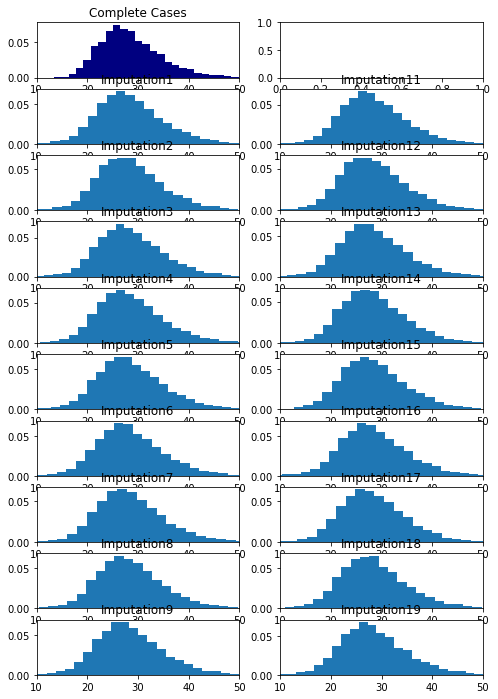

In [122]:
# plot all histograms

fig, axs = plt.subplots(10, 2, figsize = (8, 12))
fig.set_title = "BMI distribution in complete cases and imputation samples"
for j in range (2):
    for i in range(10):
        if (i==0 & j==0):          
            axs[0, 0].hist(df_smi["bmi"], bins = 30, density=True, color = "navy")
            axs[0, 0].set_title('Complete Cases')
            axs[0, 0].set_xlim(10,50)
        else:
            axs[i, j].set_xlim(10,50)
            axs[i, j].hist(df_smi_imp_all[i+j*10]["bmi"], bins = 30, density=True)
            axs[i, j].set_title("Imputation" + str(i+j*10))


In [108]:
def before_after_table(check_cols = ["n1", "n2", "n3_5"], 
                       df_before=df_smi, 
                       df_imputed=df_smi_imp_all, 
                       imputations_number =20):
    pde = pd.DataFrame(columns = check_cols)
    pde.loc["before"]= [df_before[e].sum() for e in check_cols]

    for i in range(20): pde.loc[str(i+1)] = [df_imputed[i][e].sum() for e in check_cols]
    pde["NA"] = 0
    pde.loc["before", "NA"] = df_before[check_cols[0]].isna().sum()
    pde_res = round(pde.T,0)
    a = pde_res/len(df_before)
    pde_res = pde_res.append(a)
    pde_res.T.to_clipboard()
    return round(pde_res.T,4)
    
        

In [225]:
pd.DataFrame(df_smi[ethnic_list+["bmi"]].groupby(by = ethnic_list).mean())

bmi
Asian_Bangladeshi Asian_Indian Asian_Pakistani Asian_other Black_Caribbean Black_African Black_Other Other Mixed White           
0.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   1.0    28.510201
                                                                                                           1.0   0.0    29.190460
                                                                                                     1.0   0.0   0.0    28.208007
                                                                                         1.0         0.0   0.0   0.0    29.396438
                                                                           1.0           0.0         0.0   0.0   0.0    29.801985
                                                           1.0             0.0           0.0         0.0   0.0   0.0    30.489822
                                               1.0         0.0             0.0           0.0         0.0   0.0   0.0    27.395670
                               1.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    28.519308
                  1.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    28.354406
1.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    27.746871

In [226]:
# BMI distribution before / after 

bmi_means =pd.DataFrame(df_smi[ethnic_list+["bmi"]].groupby(by = ethnic_list).mean())
bmi_means["bmi_std"] = pd.DataFrame(df_smi[ethnic_list+["bmi"]].groupby(by = ethnic_list).std())

for n_imp in range(imputations_number):
    bmi_means2 = pd.DataFrame(df_smi_imp_all[n_imp][ethnic_list+["bmi"]].groupby(by = ethnic_list).mean())
    bmi_stds2 =pd.DataFrame(df_smi_imp_all[n_imp][ethnic_list+["bmi"]].groupby(by = ethnic_list).std())
    bmi_means["bmi"+ str(n_imp)] = bmi_means2
    bmi_means["bmi"+ str(n_imp)+"_std"] = bmi_stds2
          
bmi_means

bmi  \
Asian_Bangladeshi Asian_Indian Asian_Pakistani Asian_other Black_Caribbean Black_African Black_Other Other Mixed White              
0.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   1.0    28.510201   
                                                                                                           1.0   0.0    29.190460   
                                                                                                     1.0   0.0   0.0    28.208007   
                                                                                         1.0         0.0   0.0   0.0    29.396438   
                                                                           1.0           0.0         0.0   0.0   0.0    29.801985   
                                                           1.0             0.0           0.0         0.0   0.0   0.0    30.489822   
                                               1.0         0.0             0.0           0.0         0.0   0.0   0.0    27.395670   
                               1.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    28.519308   
                  1.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    28.354406   
1.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    27.746871   

                                                                                                                         bmi_std  \
Asian_Bangladeshi Asian_Indian Asian_Pakistani Asian_other Black_Caribbean Black_African Black_Other Other Mixed White             
0.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   1.0    6.542297   
                                                                                                           1.0   0.0    6.919180   
                                                                                                     1.0   0.0   0.0    6.269115   
                                                                                         1.0         0.0   0.0   0.0    6.879561   
                                                                           1.0           0.0         0.0   0.0   0.0    6.293963   
                                                           1.0             0.0           0.0         0.0   0.0   0.0    6.778039   
                                               1.0         0.0             0.0           0.0         0.0   0.0   0.0    5.384017   
                               1.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    5.479525   
                  1.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    5.890124   
1.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   0.0    5.496076   

                                                                                                                             bmi0  \
Asian_Bangladeshi Asian_Indian Asian_Pakistani Asian_other Black_Caribbean Black_African Black_Other Other Mixed White              
0.0               0.0          0.0             0.0         0.0             0.0           0.0         0.0   0.0   1.0    28.358568   
                                                                                                           1.0   0.0    29.223573   
                                                                                                     1.0   0.0   0.0    28.054483   
                                                                                         1.0         0.0   0.0   0.0    29.137467   
                                                                           1.0           0.0         0.0   0.0   0.0    29.555934   
             

In [233]:
bmi_means.T.to_clipboard()

In [111]:
# Ethnicity distribution before and after imputation
deprivation_before_after = before_after_table(["n1", "n2", "n3_5"], df_smi, df_smi_imp_all, imputations_number)
deprivation_before_after

,n1,n2,n3_5,NA,n1,n2,n3_5,NA
before,8033.0,1206.0,190.0,730.0,0.7907,0.1187,0.0187,0.0719
1,8732.0,1205.0,229.0,0.0,0.8595,0.1186,0.0225,0.0000
2,8718.0,1163.0,277.0,0.0,0.8582,0.1145,0.0273,0.0000
3,8715.0,1230.0,221.0,0.0,0.8579,0.1211,0.0218,0.0000
4,8611.0,1271.0,279.0,0.0,0.8476,0.1251,0.0275,0.0000
5,8834.0,1245.0,75.0,0.0,0.8696,0.1226,0.0074,0.0000
6,8695.0,1215.0,250.0,0.0,0.8559,0.1196,0.0246,0.0000
7,8811.0,1179.0,169.0,0.0,0.8673,0.1161,0.0166,0.0000
8,8800.0,1169.0,184.0,0.0,0.8662,0.1151,0.0181,0.0000
9,8732.0,1289.0,145.0,0.0,0.8595,0.1269,0.0143,0.0000


In [235]:
ethnicity_before_after = before_after_table(ethnic_list, df_smi, df_smi_imp_all, imputations_number)
ethnicity_before_after.to_clipboard()
ethnicity_before_after

,Asian_Bangladeshi,Asian_Indian,Asian_Pakistani,Asian_other,Black_Caribbean,Black_African,Black_Other,Other,Mixed,White,...,Asian_Indian,Asian_Pakistani,Asian_other,Black_Caribbean,Black_African,Black_Other,Other,Mixed,White,NA
before,1462.0,484.0,339.0,289.0,739.0,861.0,873.0,385.0,432.0,3916.0,...,0.0476,0.0334,0.0284,0.0727,0.0848,0.0859,0.0379,0.0425,0.3855,0.0373
1,1492.0,520.0,371.0,314.0,785.0,902.0,905.0,426.0,474.0,3970.0,...,0.0512,0.0365,0.0309,0.0773,0.0888,0.0891,0.0419,0.0467,0.3908,0.0000
2,1498.0,522.0,382.0,335.0,781.0,889.0,904.0,416.0,466.0,3966.0,...,0.0514,0.0376,0.0330,0.0769,0.0875,0.0890,0.0409,0.0459,0.3904,0.0000
3,1502.0,520.0,370.0,317.0,779.0,893.0,906.0,431.0,464.0,3977.0,...,0.0512,0.0364,0.0312,0.0767,0.0879,0.0892,0.0424,0.0457,0.3915,0.0000
4,1504.0,513.0,376.0,329.0,768.0,898.0,914.0,419.0,469.0,3969.0,...,0.0505,0.0370,0.0324,0.0756,0.0884,0.0900,0.0412,0.0462,0.3907,0.0000
5,1496.0,530.0,375.0,325.0,774.0,890.0,910.0,418.0,472.0,3969.0,...,0.0522,0.0369,0.0320,0.0762,0.0876,0.0896,0.0411,0.0465,0.3907,0.0000
6,1503.0,520.0,378.0,322.0,773.0,893.0,907.0,428.0,472.0,3963.0,...,0.0512,0.0372,0.0317,0.0761,0.0879,0.0893,0.0421,0.0465,0.3901,0.0000
7,1497.0,518.0,380.0,314.0,778.0,900.0,911.0,416.0,471.0,3974.0,...,0.0510,0.0374,0.0309,0.0766,0.0886,0.0897,0.0409,0.0464,0.3912,0.0000
8,1496.0,527.0,375.0,333.0,772.0,897.0,899.0,423.0,467.0,3970.0,...,0.0519,0.0369,0.0328,0.0760,0.0883,0.0885,0.0416,0.0460,0.3908,0.0000
9,1493.0,514.0,384.0,330.0,772.0,898.0,912.0,429.0,465.0,3962.0,...,0.0506,0.0378,0.0325,0.0760,0.0884,0.0898,0.0422,0.0458,0.3900,0.0000


# Nested cross-validation for each imputation

#### functions for nested cross-validation:

In [227]:
def rubins_rule(means, stds):
    m = len(means)
    pooled_mean = means.mean()
    pooled_std = stds.mean() + (1+1/m)*stds.std()
    return (pooled_mean, pooled_std)

In [279]:
def mean_std_score(grid_obj_i, scorer_name):
    #takes results grid and takes out mean and std by CV steps for a scorer
    cvr = pd.DataFrame(grid_obj_i.cv_results_)
    bestr = cvr.loc[cvr["params"] == grid_obj_i.best_params_, :]
    namei = ["split"+str(i)+"_test_" + scorer_name for i in range(9)]
    return np.array([bestr[namei].mean(axis=1),  bestr[namei].std(axis=1)])

def get_imputation_stats(grid_obj_cv):
    # returns stats for all imputations, averaged across CV steps
    #	AUC	AUCstd	f1_05	f1_05std	f1_y	f1_ystd	precision_y	precision_ystd	recall_y	recall_ystd
    #0	0.839831	0.012351	0.325775	0.064058	0.402042	0.042921	0.257309	0.037519	0.939778	0.032701
    #1	0.839418	0.017797	0.322628	0.052490	0.388147	0.072252	0.248480	0.063786	0.946361	0.050778
    
    scores_for_20imp = np.zeros((imputations_number,12))
    for i in range(imputations_number):
        scores_for_20imp[i, [0,1]] = mean_std_score(grid_obj_cv[i], "AUC").flatten()
        scores_for_20imp[i, [2,3]] = mean_std_score(grid_obj_cv[i], "f1_05").flatten()
        scores_for_20imp[i, [4,5]] = mean_std_score(grid_obj_cv[i], "f1_y").flatten()
        scores_for_20imp[i, [6,7]] = mean_std_score(grid_obj_cv[i], "precision_y").flatten()
        scores_for_20imp[i, [8,9]] = mean_std_score(grid_obj_cv[i], "recall_y").flatten()
        scores_for_20imp[i, [10,11]] = mean_std_score(grid_obj_cv[i], "bs").flatten()
        
    scores_for_20imp = pd.DataFrame(scores_for_20imp)
    scores_for_20imp.columns = ["AUC","AUCstd","f1_05","f1_05std","f1_y","f1_ystd",
                            "precision_y","precision_ystd","recall_y","recall_ystd",
                               "BS", "BSstd"]
    return scores_for_20imp

In [229]:
#initial models
gbm_best = HistGradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                               min_samples_leaf=70)

logit_simple = LogisticRegression(max_iter=300, penalty='none')

#### nested CV for GBDT:

In [230]:
# performing nested CV : 
# grid search in 10-fold CV where each combination of the grid is run and test scorings are computed 
gbm_start = HistGradientBoostingClassifier(max_iter=100, min_samples_leaf=5, learning_rate = 0.05, max_depth = 20)

grid_gbm = {'min_samples_leaf' : [50,75,100,125,150], 'max_depth':[4,6,8],
           'learning_rate': [0.1, 0.2]}

gbm_grid_cv = []
start = time.time()
for i in range(imputations_number):
    print (i)
    X = df_smi_imp_all[i][risk_factors]
    y = df_smi_imp_all[i]["D_binary"]
    dt_optim_model = GridSearchCV(gbm_start, grid_gbm, n_jobs = 4, cv = 10, 
                           scoring = scoring_combined, refit = 'AUC', return_train_score = 0)
    dt_optim_model.fit(X,y)
    print (dt_optim_model.best_estimator_)
    gbm_grid_cv.append(dt_optim_model)   

end = time.time()
print (end - start)


0
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
1
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
2
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
3
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
4
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
5
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
6
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
7
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=75)
8
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
9
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
10
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
11
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
12
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150)
13
HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125)
14
HistGradientBoostingClassifier(max_depth=4

#### store tuned models into gbm[] for each imputation:

In [259]:
#store all optimized models in one object "gbm"
gbm = [gbm_grid_cv[i].best_estimator_ for i in range(imputations_number)]
gbm

[HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=75),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=150),
 HistGradientBoostingClassifier(max_depth=4, min_samples_leaf=125),
 HistGradientBoostingClassifier(max_depth=4, min_

In [280]:
scores_for_20imp_gbm = get_imputation_stats(gbm_grid_cv)
scores_for_20imp_gbm

,AUC,AUCstd,f1_05,f1_05std,f1_y,f1_ystd,precision_y,precision_ystd,recall_y,recall_ystd,BS,BSstd
0,0.829130,0.020538,0.320745,0.053664,0.366733,0.078064,0.233627,0.079012,0.952989,0.065358,0.135936,0.007406
1,0.829225,0.020326,0.312161,0.054450,0.353764,0.035647,0.217039,0.028330,0.970600,0.017262,0.137467,0.006960
2,0.828533,0.018974,0.302906,0.055610,0.347693,0.037186,0.212532,0.030807,0.976477,0.029832,0.138451,0.006360
3,0.829127,0.018486,0.310445,0.053093,0.383380,0.076698,0.246583,0.073339,0.944256,0.067313,0.137467,0.006360
4,0.829717,0.018828,0.296301,0.047812,0.370480,0.080784,0.237429,0.084458,0.954456,0.071750,0.139545,0.005942
5,0.828563,0.020745,0.307519,0.050085,0.343621,0.024721,0.208800,0.018671,0.977233,0.015162,0.137905,0.006463
6,0.831681,0.019818,0.315728,0.054776,0.367514,0.057383,0.229772,0.051414,0.961770,0.036853,0.136264,0.005699
7,0.829301,0.019184,0.304203,0.052165,0.380304,0.063346,0.241481,0.055688,0.944154,0.046748,0.138014,0.005386
8,0.830314,0.018853,0.308228,0.053192,0.359908,0.022747,0.221395,0.017491,0.966229,0.010647,0.136920,0.006036
9,0.828984,0.020663,0.308770,0.062733,0.370588,0.092888,0.246184,0.119137,0.942668,0.106080,0.136920,0.008241


####  Internal cross-validation for Logistic Regression:

In [245]:
logit_scores_1_20 = []
for i in range(imputations_number):
    X = df_smi_imp_all[i][risk_factors]
    y = df_smi_imp_all[i]["D_binary"]
    logit_scores_i = cross_validate(logit_simple, X,y,cv=10,scoring=scoring_combined,
                              return_train_score=False)
    #print (logit_scores_i)
    logit_scores_1_20.append(logit_scores_i)   

In [281]:
scores_for_20imp_logit = get_imputation_stats_logit(logit_scores_1_20)
scores_for_20imp_logit

,AUC,AUCstd,f1_05,f1_05std,f1_y,f1_ystd,precision_y,precision_ystd,recall_y,recall_ystd,BS,BSstd
0,0.830946,0.022247,0.306007,0.073334,0.380841,0.091783,0.250710,0.107255,0.943072,0.086876,0.148054,0.029158
1,0.829837,0.022070,0.297988,0.081260,0.392980,0.087099,0.259432,0.102544,0.936467,0.076247,0.148348,0.025834
2,0.831098,0.020158,0.293028,0.079594,0.387997,0.081592,0.252928,0.088558,0.941748,0.074667,0.149137,0.028067
3,0.830900,0.021971,0.303635,0.084980,0.403791,0.087940,0.270271,0.106027,0.926599,0.083563,0.148644,0.026983
4,0.831335,0.022348,0.292979,0.077090,0.386548,0.092334,0.253585,0.104429,0.949046,0.074810,0.149234,0.024786
5,0.830669,0.022116,0.298520,0.076154,0.385771,0.085334,0.252944,0.101205,0.942441,0.075147,0.148841,0.026326
6,0.833188,0.022519,0.310517,0.077725,0.388206,0.081917,0.254254,0.097026,0.941783,0.074087,0.147758,0.027681
7,0.830452,0.021349,0.301387,0.079185,0.381764,0.090266,0.250150,0.104538,0.947059,0.078309,0.147954,0.024640
8,0.831980,0.022131,0.303328,0.076790,0.387579,0.087043,0.254472,0.101964,0.944414,0.076884,0.148348,0.024876
9,0.831146,0.022808,0.307249,0.082783,0.391643,0.089099,0.258236,0.103316,0.939143,0.075713,0.147266,0.026600


In [282]:
def pooled_stats(scores_for_20imp):
    b = np.zeros((1,12))
    b[0, [0,1]] = rubins_rule(scores_for_20imp["AUC"], scores_for_20imp["AUCstd"])
    b[0, [2,3]] = rubins_rule(scores_for_20imp["f1_05"], scores_for_20imp["f1_05std"])
    b[0, [4,5]] = rubins_rule(scores_for_20imp["f1_y"], scores_for_20imp["f1_ystd"])
    b[0, [6,7]] = rubins_rule(scores_for_20imp["precision_y"], scores_for_20imp["precision_ystd"])
    b[0, [8,9]] = rubins_rule(scores_for_20imp["recall_y"], scores_for_20imp["recall_ystd"])
    b[0, [10,11]] = rubins_rule(scores_for_20imp["BS"], scores_for_20imp["BSstd"])
    b = pd.DataFrame(b)
    b.columns = scores_for_20imp.columns
    return b
    

In [283]:
pooled_stats(scores_for_20imp_logit)

,AUC,AUCstd,f1_05,f1_05std,f1_y,f1_ystd,precision_y,precision_ystd,recall_y,recall_ystd,BS,BSstd
0,0.831295,0.022805,0.302231,0.082339,0.389119,0.090043,0.255987,0.106678,0.941113,0.082002,0.148294,0.027753


In [284]:
pooled_stats(scores_for_20imp_gbm)

,AUC,AUCstd,f1_05,f1_05std,f1_y,f1_ystd,precision_y,precision_ystd,recall_y,recall_ystd,BS,BSstd
0,0.829621,0.020828,0.308372,0.059299,0.365224,0.085384,0.231208,0.098184,0.956946,0.085101,0.137527,0.007285


In [285]:
results = pd.concat([pooled_stats(scores_for_20imp_gbm),pooled_stats(scores_for_20imp_logit)]) #pooled_stats(scores_for_20imp_dt)
results.index = ["GBDT","Logit"]

In [286]:
results

,AUC,AUCstd,f1_05,f1_05std,f1_y,f1_ystd,precision_y,precision_ystd,recall_y,recall_ystd,BS,BSstd
GBDT,0.829621,0.020828,0.308372,0.059299,0.365224,0.085384,0.231208,0.098184,0.956946,0.085101,0.137527,0.007285
Logit,0.831295,0.022805,0.302231,0.082339,0.389119,0.090043,0.255987,0.106678,0.941113,0.082002,0.148294,0.027753


# Variable importance

In [287]:
from sklearn.inspection import permutation_importance

In [288]:
# to measure variable importance we use permutation - how much change in ROC-AUC is it if a variable is mutated
# on a hold-out sample
# we do it by avering over imputations, using 5-fold CV

In [291]:
from sklearn.model_selection import StratifiedKFold

mean_importance = []
for j in range(imputations_number):
    X = df_smi_imp_all[10][risk_factors]
    y = df_smi_imp_all[10]["D_binary"]

    skf = StratifiedKFold(n_splits=5)
    skf.get_n_splits(X, y)

    importance_dt = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.loc[train_index, ], X.loc[test_index, ]
        y_train, y_test = y[train_index], y[test_index]
    
        gbm_best.fit(X_train,y_train)
        logit_simple.fit(X_train,y_train)
    
        importance_gbm_i = permutation_importance(gbm_best, X_test, y_test, scoring = "roc_auc")
        importance_logit_i = permutation_importance(logit_simple, X_test, y_test,scoring = "roc_auc") 

        df_i = pd.DataFrame({"logit": importance_logit_i["importances_mean"],
                         "GBDT" : importance_gbm_i["importances_mean"]}, index = risk_factors)
        #importance_dt = pd.concat([importance_dt, df_i])
        importance_dt.append(df_i)

    mean_importance_cvj = 0.2*(importance_dt[0]+importance_dt[1]+importance_dt[2]+importance_dt[3]+importance_dt[4])
    mean_importance.append(mean_importance_cvj)

mean_importance = 1/20*(mean_importance[0]+mean_importance[1]+mean_importance[2]+mean_importance[3]+mean_importance[4]+
                   mean_importance[5]+mean_importance[6]+mean_importance[7]+mean_importance[8]+mean_importance[9]+
                   mean_importance[10]+mean_importance[11]+mean_importance[12]+mean_importance[13]+mean_importance[14]+
                   mean_importance[15]+mean_importance[16]+mean_importance[17]+mean_importance[18]+mean_importance[19])
    

In [293]:
np.round(mean_importance[["logit", "GBDT"]],4)

,logit,GBDT
age_,0.2060,0.1298
age_2,0.0036,-0.0005
gender,-0.0004,0.0002
bmi_,0.0489,0.0319
age_bmi_,0.0021,0.0017
cvd,0.0033,0.0026
hypdum,0.0371,0.0457
Asian_Bangladeshi,0.0731,0.0492
Asian_Indian,0.0083,0.0033
Asian_Pakistani,0.0073,0.0028


<BarContainer object of 22 artists>

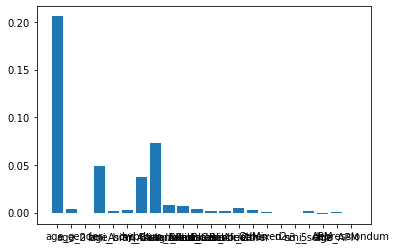

In [294]:
plt.bar(mean_importance.index, mean_importance["logit"])

In [296]:
np.round(mean_importance[["logit", "GBDT"]],6).to_clipboard()

# Calibration plots and stats

In [297]:

def calib_plot_many (y_tests, y_predict_probas, names = [], bins = 10, title = '', calib_slope = 0):
    n = len(y_tests)
    if n != len(y_predict_probas): return None
    colors = []
    cmap = cmap=plt.get_cmap("rainbow") #"Pastel2_r"
    label_prefix = ''
    for i in range(n):
            colors.append(cmap(i/float(n)))

    if n <= 4: colors = ['grey', 'blue', 'green', 'red','red', 'red', 'red', 'red']
    
    for i in range(n):
        if len(names)>0: label_prefix = names[i]
        # can add calib slope and intercept 
        if calib_slope ==1: 
            slope, ci_slope, intercept, ci_intercept = calib_slope_with_conf_int(y_predict_probas[i], y_tests[i])
            r2 = r2_score(y_tests[i], y_predict_probas[i])
            c_st = roc_auc_score(y_tests[i], y_predict_probas[i])
            brier = brier_score_loss(y_tests[i], y_predict_probas[i])
            #AP = average_precision_score(y_tests[i], y_predict_probas[i])
            label_ = label_prefix + '\nCalibration slope ' + str(round(slope,3))+' (+/-'+str(round(ci_slope,3))+ ')'+ '\nCalibration-in-the-large ' + str(round(intercept,3))+' (+/-'+str(round(ci_intercept,3))+')'+ '\nScaled Brier score' + str(round(r2,3)) + '\nAUC-ROC '+str(round(c_st,3)) #+ ', AUC-PRC '+str(round(AP,3))
        else: 
            label_ = label_prefix
    
        # can add title name instead of model name
        if title == '': 
            title_ = 'Calibration plot'
        else:
            title_ = title
    
        pre_true, pre_predict = calibration_curve(y_tests[i], y_predict_probas[i], n_bins =bins)
        # fig, ax = plt.subplots()
        # only these two lines are calibration curves
        plt.plot(pre_predict, pre_true, color = colors[i],marker='o', linewidth=1, label=label_) 
    
    plt.plot(np.linspace(0,1,bins),np.linspace(0,1,bins), color = 'grey')
    plt.title(title_)
    plt.xlabel('Predicted prevalence')
    plt.ylabel('True T2DM rate')
    
    plt.legend(loc="upper center", bbox_to_anchor=(1.2, 0, 0.5, 1))
    plt.show()
    return None 

def calib_slope (x_predict_test, y_test):
    try:
        phat = np.log(x_predict_test/ (1-x_predict_test)) 
        logit_df = pd.DataFrame({'slope':np.array(phat), 'intercept':np.ones(len(x_predict_test)), 'y': np.array(y_test)})
        sm_model = sm.Logit(logit_df['y'], logit_df[['slope', 'intercept']]).fit(disp=0)
        s,a = sm_model.params[0],sm_model.params[1]
#     print("Model slope:    ", sm_model.params[0])
#     print("Model intercept:", sm_model.params[1])
#     print (sm_model.summary())
    except: 
        s = np.nan
        a = np.nan
    return s, a

def calib_slope_with_conf_int (x_predict_test, y_test):
    try:
        phat = np.log(x_predict_test/ (1-x_predict_test)) 

        logit_df = pd.DataFrame({'slope':np.array(phat), 'intercept':np.ones(len(x_predict_test)), 'y': np.array(y_test)})
        sm_model = sm.Logit(logit_df['y'], logit_df[['slope', 'intercept']]).fit(disp=0)
        s,a = sm_model.params[0],sm_model.params[1]
        #     print("Model slope:    ", sm_model.params[0])
        #     print("Model intercept:", sm_model.params[1])
        #     print (sm_model.summary())
        ci_s = (sm_model.conf_int().loc['slope'][1]-sm_model.conf_int().loc['slope'][0])/2
        ci_a = (sm_model.conf_int().loc['intercept'][1]-sm_model.conf_int().loc['intercept'][0])/2
        
    except: 
        s = np.nan
        a = np.nan
        ci_s = np.nan
        ci_a = np.nan

    return s, ci_s, a, ci_a

def calib_plot (model, y_test, y_predict_proba_pre_, bins = 10, title = '', calib_slope = 0):
    # can add calib slope and intercept 
    if calib_slope ==1: 
        slope, ci_slope, intercept, ci_intercept = calib_slope_with_conf_int(y_predict_proba_pre_, y_test)
        r2 = r2_score(y_test, y_predict_proba_pre_)
        c_st = roc_auc_score(y_test, y_predict_proba_pre_)
        brier = brier_score_loss(y_test, y_predict_proba_pre_)
        AP = average_precision_score(y_test, y_predict_proba_pre_)
        label_ = 'Slope ' + str(round(slope,3))+' (+/-'+str(round(ci_slope,3))+ ')'+ '\nIntercept ' + str(round(intercept,3))+' (+/-'+str(round(ci_intercept,3))+')'+ '\nscaledBrier ' + str(round(r2,3)) + '\nAUC-ROC '+str(round(c_st,3)) # + '\nAUC-PRC '+str(round(AP,3))
    
    else: 
        label_ = 'Calibration plot'
    
    # can add title name instead of model name
    if title == '': 
        title_ = model.__class__.__name__
    else:
        title_ = title
    
    pre_true, pre_predict = calibration_curve(y_test, y_predict_proba_pre_, n_bins =bins)
    fig, ax = plt.subplots()
    # only these two lines are calibration curves
    plt.plot(pre_predict, pre_true, color = 'blue',marker='o', linewidth=1, label=label_)
    plt.plot(np.linspace(0,1,bins),np.linspace(0,1,bins), color = 'grey')
    fig.suptitle(title_)
    ax.set_xlabel('Predicted prevalence')
    ax.set_ylabel('Observed T2DM rate')
    plt.legend()
    plt.show()
    return None 

In [298]:
#logit_simple = LogisticRegression(max_iter=300, penalty='none')

In [299]:
# to validate slopes and alphas for each imputation, running the cycle 
# over 20 imputations and 10 CV 

calib_gbm = np.zeros((imputations_number,6))
calib_logit = np.zeros((imputations_number,6))

for imp_n in range(imputations_number):

    gbm_imp = gbm[imp_n]
    X = df_smi_imp_all[imp_n][risk_factors]
    y = df_smi_imp_all[imp_n]["D_binary"]

    folds = 10
    skf = StratifiedKFold(n_splits=folds, shuffle = True , random_state  = 42)
    skf.get_n_splits(X, y)

    slopesgbm = np.zeros(folds)
    alphasgbm = np.zeros(folds)
    r2gbm  = np.zeros(folds)
    
    slopeslogit = np.zeros(folds)
    alphaslogit = np.zeros(folds)
    r2logit  = np.zeros(folds)

    i=0
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.loc[train_index, ], X.loc[test_index, ]
        y_train, y_test = y[train_index], y[test_index]

        gbm_imp.fit(X_train,y_train)
        logit_simple.fit(X_train,y_train)

        y_predict_gbm =  gbm_imp.predict_proba(X_test)[:,1]
        y_predict_logit =  logit_simple.predict_proba(X_test)[:,1]

        r2gbm[i] = r2_score(y_test, y_predict_gbm)
        r2logit[i] = r2_score(y_test, y_predict_logit)
        
        slopesgbm[i], alphasgbm[i] = calib_slope(y_predict_gbm, y_test)
        slopeslogit[i], alphaslogit[i] = calib_slope(y_predict_logit, y_test)

        i+=1    

    calib_gbm[imp_n, :] =  [np.median(slopesgbm), np.std(slopesgbm), np.median(alphasgbm), 
                            np.std(alphasgbm), np.median(r2gbm), np.std(r2gbm)]
    calib_logit[imp_n, :] =  [np.median(slopeslogit), np.std(slopeslogit), np.median(alphaslogit), np.std(alphaslogit), 
                             np.median(r2logit), np.std(r2logit)]


In [300]:
np.round(calib_logit,3)

array([[ 1.025e+00,  1.080e-01,  1.000e-03,  1.420e-01,  2.130e-01,
         3.700e-02],
       [ 9.940e-01,  9.500e-02, -2.600e-02,  1.230e-01,  2.070e-01,
         3.100e-02],
       [ 9.860e-01,  8.300e-02, -4.400e-02,  1.080e-01,  2.050e-01,
         2.800e-02],
       [ 9.870e-01,  8.700e-02, -3.400e-02,  1.080e-01,  2.080e-01,
         3.100e-02],
       [ 9.910e-01,  9.400e-02, -1.800e-02,  1.240e-01,  2.070e-01,
         3.200e-02],
       [ 1.000e+00,  1.020e-01, -3.300e-02,  1.260e-01,  2.120e-01,
         3.200e-02],
       [ 1.002e+00,  1.020e-01, -3.400e-02,  1.310e-01,  2.090e-01,
         3.400e-02],
       [ 9.870e-01,  8.600e-02, -3.400e-02,  1.090e-01,  2.030e-01,
         3.000e-02],
       [ 9.950e-01,  9.300e-02, -2.900e-02,  1.200e-01,  2.120e-01,
         3.300e-02],
       [ 9.960e-01,  8.300e-02, -3.000e-02,  1.020e-01,  2.110e-01,
         2.800e-02],
       [ 9.900e-01,  9.300e-02, -3.600e-02,  1.150e-01,  2.090e-01,
         3.300e-02],
       [ 1.001e+00,  

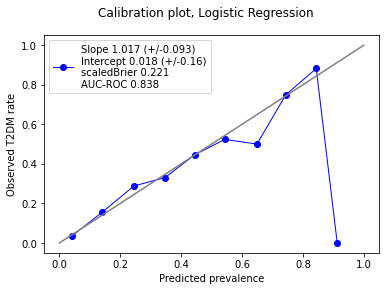

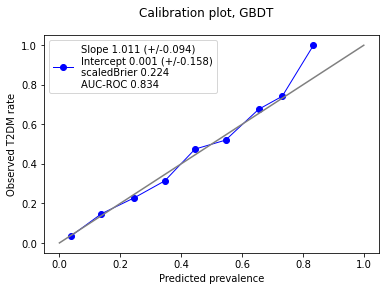

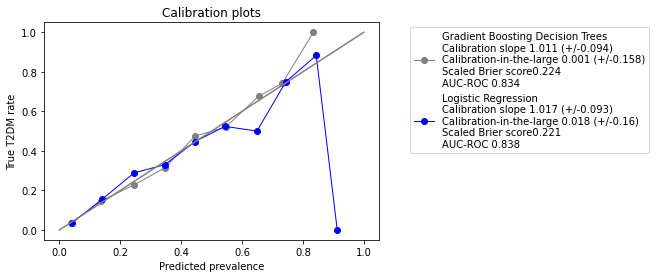

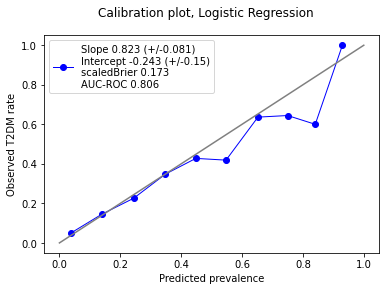

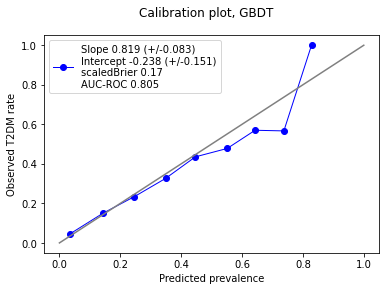

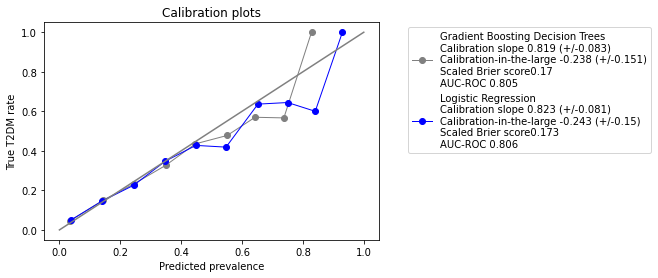

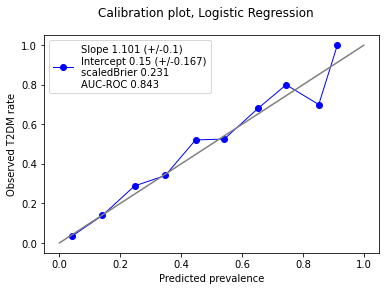

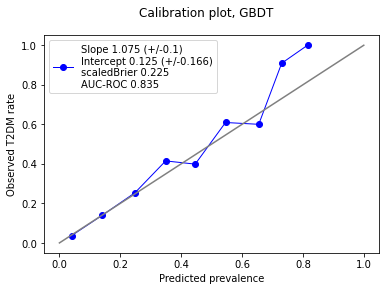

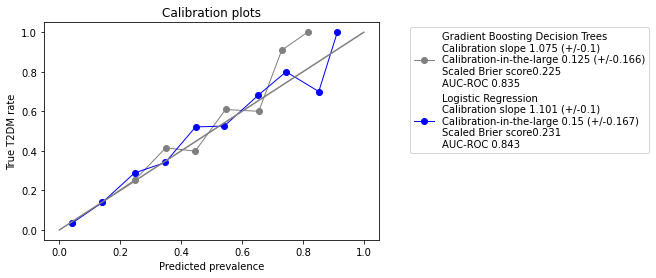

In [301]:
#calibration plots
for imp_n in [20]:

    gbm_imp = gbm[imp_n]
    X = df_smi_imp_all[imp_n][risk_factors]
    y = df_smi_imp_all[imp_n]["D_binary"]

    folds = 3
    skf = StratifiedKFold(n_splits=folds, shuffle = True , random_state  = 42)
    skf.get_n_splits(X, y)

    i=0
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.loc[train_index, ], X.loc[test_index, ]
        y_train, y_test = y[train_index], y[test_index]

        gbm_imp.fit(X_train,y_train)
        logit_simple.fit(X_train,y_train)

        y_predict_gbm =  gbm_imp.predict_proba(X_test)[:,1]
        y_predict_logit =  logit_simple.predict_proba(X_test)[:,1]

        calib_plot(logit_simple, y_test, y_predict_logit, calib_slope =1, title = "Calibration plot, Logistic Regression")
        calib_plot(gbm_imp, y_test, y_predict_gbm, calib_slope =1, title=  "Calibration plot, GBDT")
        
        
        calib_plot_many ([y_test, y_test], [y_predict_gbm, y_predict_logit], 
                         names = ["Gradient Boosting Decision Trees", "Logistic Regression"], bins = 10, title = 'Calibration plots', 
                         calib_slope = 1)
        
        i+=1    


In [305]:
#checking r2 and scaled brier score is the same
r2 = r2_score(y_test, y_predict_gbm)
c_st = roc_auc_score(y_test, y_predict_gbm)
brier = brier_score_loss(y_test, y_predict_gbm)
1-brier/np.std(y_test)**2, r2

(0.22456521977528976, 0.2245652197753274)

In [306]:
# GBM pooled mean and std for calabration slope 
rubins_rule(calib_gbm[:,0], calib_gbm[:,1])

# GBM pooled mean and std for calabration alpha 
rubins_rule(calib_gbm[:,2], calib_gbm[:,3])

# logit pooled mean and std for calabration slope 
rubins_rule(calib_logit[:,0], calib_logit[:,1])

# logit pooled mean and std for calabration alpha 
rubins_rule(calib_logit[:,2], calib_logit[:,3])

(-0.02924326079270311, 0.130682456126505)

In [307]:
#adding slopes and alphas to "results" to keep all main results in that table
results["Slope"] = 0
results["Slopestd"] = 0
results["Alpha"] = 0
results["Alphastd"] = 0
results["ScaledBS"] = 0
results["ScaledBSstd"] = 0

#slope
results.loc["GBDT", "Slope"], results.loc["GBDT", "Slopestd"] = rubins_rule(calib_gbm[:,0], calib_gbm[:,1])
results.loc["Logit", "Slope"], results.loc["Logit", "Slopestd"] = rubins_rule(calib_logit[:,0], calib_logit[:,1])
#alpha
results.loc["GBDT", "Alpha"], results.loc["GBDT", "Alphastd"] = rubins_rule(calib_gbm[:,2], calib_gbm[:,3])
results.loc["Logit", "Alpha"], results.loc["Logit", "Alphastd"] = rubins_rule(calib_logit[:,2], calib_logit[:,3])
#BS
results.loc["GBDT", "ScaledBS"], results.loc["GBDT", "ScaledBSstd"] = rubins_rule(calib_gbm[:,4], calib_gbm[:,5])
results.loc["Logit", "ScaledBS"], results.loc["Logit", "ScaledBSstd"] = rubins_rule(calib_logit[:,4], calib_logit[:,5])


#### Pooled performance results:

In [308]:
#Pooled performance results:

results.T.to_clipboard()
results.T

,GBDT,Logit
AUC,0.829621,0.831295
AUCstd,0.020828,0.022805
f1_05,0.308372,0.302231
f1_05std,0.059299,0.082339
f1_y,0.365224,0.389119
f1_ystd,0.085384,0.090043
precision_y,0.231208,0.255987
precision_ystd,0.098184,0.106678
recall_y,0.956946,0.941113
recall_ystd,0.085101,0.082002


In [309]:
results.loc[["Logit", "GBDT"], ["AUC", "AUCstd", "ScaledBS", "ScaledBSstd", "Slope", "Slopestd", "Alpha", "Alphastd"]].T

,Logit,GBDT
AUC,0.831295,0.829621
AUCstd,0.022805,0.020828
ScaledBS,0.208302,0.203598
ScaledBSstd,0.034405,0.032045
Slope,0.995987,0.974234
Slopestd,0.101190,0.096225
Alpha,-0.029243,-0.016340
Alphastd,0.130682,0.122315


#### Plot calibration results

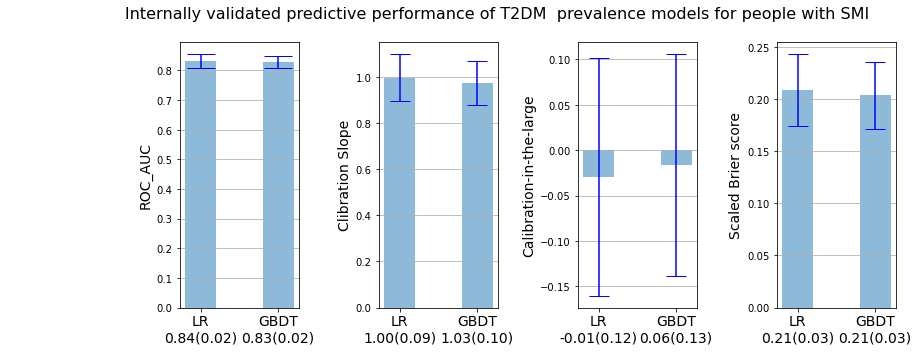

In [310]:
models1 = ["LR\n0.84(0.02)", "GBDT\n0.83(0.02)"]
models2 = ["LR\n1.00(0.09)", "GBDT\n1.03(0.10)"]
models3 = ["LR\n-0.01(0.12)", "GBDT\n0.06(0.13)"]
models4 = ["LR\n0.21(0.03)", "GBDT\n0.21(0.03)"]

models = ["LogisticRegr", "GBDT"]

x_pos = np.arange(len(models))*2
means = [results.loc["Logit", "AUC"], results.loc["GBDT", "AUC"]]
stds = [results.loc["Logit", "AUCstd"], results.loc["GBDT", "AUCstd"]]

#means2 = [results.loc["Logit", "Slope"], results.loc["GBDT", "Slope"]]
#stds2 = [results.loc["Logit", "Slopestd"], results.loc["GBDT", "Slopestd"]]

means2 = [results.loc["Logit", "Slope"], results.loc["GBDT", "Slope"]]
stds2 = [results.loc["Logit", "Slopestd"], results.loc["GBDT", "Slopestd"]]

means3 = [results.loc["Logit", "Alpha"], results.loc["GBDT", "Alpha"]]
stds3 = [results.loc["Logit", "Alphastd"], results.loc["GBDT", "Alphastd"]]

means4 = [results.loc["Logit", "ScaledBS"], results.loc["GBDT", "ScaledBS"]]
stds4 = [results.loc["Logit", "ScaledBSstd"], results.loc["GBDT", "ScaledBSstd"]]


fig, ax = plt.subplots(1,4, figsize=(11,5))

ax[0].bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='blue', capsize=14) #, color = "grey")
ax[0].set_ylabel("ROC_AUC",size =14)  # ($\degree C^{-1}$)')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(models1, size =14)
#ax[0].set_title("Internally validated predictive performance of T2DM prevalence models for people with SMI \n" )
ax[0].yaxis.grid(True)


ax[1].bar(x_pos, means2, yerr=stds2, align='center', alpha=0.5, ecolor='blue', capsize=10)
ax[1].set_ylabel("Clibration Slope", size =14)  # ($\degree C^{-1}$)')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(models2, size =14)
ax[1].set_title("                       Internally validated predictive performance of T2DM  prevalence models for people with SMI\n" , size=16)
ax[1].yaxis.grid(True)

ax[2].bar(x_pos, means3, yerr=stds3, align='center', alpha=0.5, ecolor='blue', capsize=10)
ax[2].set_ylabel("Calibration-in-the-large", size =14)  # ($\degree C^{-1}$)')
ax[2].set_xticks(x_pos)
ax[2].set_xticklabels(models3, size =14)
#ax[2].set_title("Internally validated predictive performance of T2DM  prevalence models for people with SMI\n" , size=16)
ax[2].yaxis.grid(True)

ax[3].bar(x_pos, means4, yerr=stds4, align='center', alpha=0.5, ecolor='blue', capsize=10)
ax[3].set_ylabel("Scaled Brier score", size =14)  # ($\degree C^{-1}$)')
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(models4, size =14)
#ax[2].set_title("Internally validated predictive performance of\n T2DM prevalence models for people with SMI" )
ax[3].yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('Internally validated predictive performance.png')
plt.show()


## Logit model with pooled coefficients 

In [406]:
#running logits and saving coefficients with 95% to "logit_coefs"
risk_factors_reordered = ['age_', 'age_2', 'gender', 'bmi_', 'age_bmi_', 'cvd', 'hypdum', "Asian_Bangladeshi","Asian_Indian", "Asian_Pakistani", 
                        "Asian_other", "Black_Caribbean","Black_African", "Black_Other", "Mixed", "Other", 'n2', 'n3_5', 'smi_schiz', 'APM', 'age_APM', 'depressiondum']
logit_coefs = []
for imp_n in range(imputations_number):
    Xi = df_smi_imp_all[imp_n][risk_factors_reordered]
    yi = df_smi_imp_all[imp_n]["D_binary"]
    sm_model = sm.Logit(yi, sm.add_constant(Xi)).fit(disp=0)
    output_i = sm_model.conf_int()
    output_i.columns = ['2.5', '97.5']
    output_i['params_std'] = (output_i['97.5']-output_i['2.5'])/3.96
    output_i['params'] = round(sm_model.params,5)
    output_i['pvalues'] = round(sm_model.pvalues,5)
    logit_coefs.append(output_i)


In [448]:
# pooling results across imputations 
logit_coefs_mean = sum([logit_coefs[i]["params"] for i in range(imputations_number)])/imputations_number
logit_coefs_std = sum([logit_coefs[i]["params_std"] for i in range(imputations_number)])/imputations_number
logit_coefs_std_std = [np.std([(logit_coefs[i]["params"][j]) for i in range(20)]) for j in range(len(risk_factors_reordered)+1)]
logit_coefs_pooled_std = logit_coefs_std + (1+1/imputations_number)*np.array(logit_coefs_std_std)

In [473]:
results_logitparams = pd.DataFrame({"coef":logit_coefs_mean, 
                "z-score": logit_coefs_mean/logit_coefs_pooled_std, 
                "p-value": stats.norm.sf(abs(logit_coefs_mean/logit_coefs_pooled_std))*2,
                "95CI_High": logit_coefs_mean+1.98*logit_coefs_pooled_std,
                "95CI_Low": logit_coefs_mean-1.98*logit_coefs_pooled_std,
                "exp(coef)": np.exp(logit_coefs_mean),
                "95CI_High(exp)": np.exp( logit_coefs_mean+1.98*logit_coefs_pooled_std),
                "95CI_Low(exp)": np.exp( logit_coefs_mean-1.98*logit_coefs_pooled_std)})


In [475]:
round(results_logitparams,5)

,coef,z-score,p-value,95CI_High,95CI_Low,exp(coef),95CI_High(exp),95CI_Low(exp)
const,-3.82356,-25.35151,0.00000,-3.52493,-4.12219,0.02185,0.02945,0.01621
age_,1.04846,10.54355,0.00000,1.24535,0.85156,2.85325,3.47415,2.34331
age_2,-0.15883,-5.58017,0.00000,-0.10247,-0.21518,0.85314,0.90260,0.80639
gender,-0.02762,-0.38627,0.69930,0.11395,-0.16918,0.97276,1.12069,0.84436
bmi_,0.43223,10.57439,0.00000,0.51316,0.35129,1.54068,1.67056,1.42090
age_bmi_,-0.07879,-2.79425,0.00520,-0.02296,-0.13463,0.92423,0.97730,0.87404
cvd,0.74635,5.04548,0.00000,1.03924,0.45346,2.10929,2.82707,1.57375
hypdum,1.15683,14.46663,0.00000,1.31516,0.99850,3.17983,3.72534,2.71420
Asian_Bangladeshi,2.07819,17.81853,0.00000,2.30912,1.84726,7.99000,10.06556,6.34243
Asian_Indian,1.07116,6.75477,0.00000,1.38514,0.75717,2.91875,3.99539,2.13224


In [484]:
results_logitparams.to_clipboard()

<BarContainer object of 23 artists>

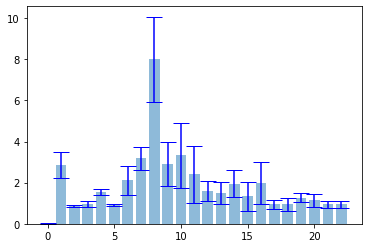

In [483]:
risk_factors_ = risk_factors + ["C"]
x_pos = np.arange(len(risk_factors)+1)*2
plt.bar(range(len(results_logitparams.index)),results_logitparams["exp(coef)"], 
        yerr=results_logitparams["95CI_High(exp)"] - results_logitparams["exp(coef)"] ,
        align='center', alpha=0.5, ecolor='blue', capsize=8)
#plt.set_xticks(x_pos)
#plt.labels(risk_factors, size =14)

# Ageing population v2

In [333]:
pop = pd.read_csv("Population_2022_2042.csv")
pop = pop.loc[pop.Sex == "MF", :]
pop = pop.loc[(pop.Year == 2042)|(pop.Year == 2022), :]
pop

,Sex,age_cat,Year,Asian_Bangladeshi,Asian_Indian,Asian_Pakistani,Asian_other,Black_Caribbean,Black_African,Black_Other,Other,Mixed,White,All
16,MF,-1,2042,54598.0,14219.0,12902.0,12326.0,5694.0,21922.0,11733.0,12411.0,31040.0,66892.0,243737.0
17,MF,0,2042,47026.0,35160.0,17772.0,29791.0,7461.0,19505.0,6977.0,13943.0,20958.0,185486.0,384079.0
18,MF,1,2042,44089.0,30509.0,14250.0,20097.0,9537.0,25493.0,6274.0,15188.0,13578.0,139528.0,318543.0
19,MF,2,2042,36248.0,19091.0,9717.0,13988.0,15672.0,24663.0,6082.0,11987.0,7776.0,84902.0,230126.0
20,MF,-1,2022,54621.0,13444.0,12404.0,11474.0,6726.0,23681.0,10835.0,11239.0,26966.0,59931.0,231321.0
21,MF,0,2022,41881.0,32845.0,16165.0,27806.0,7785.0,18882.0,5829.0,12579.0,17495.0,172751.0,354018.0
22,MF,1,2022,40928.0,22092.0,11526.0,17135.0,11036.0,25659.0,6111.0,12966.0,10845.0,119086.0,277384.0
23,MF,2,2022,14487.0,10376.0,4963.0,8328.0,12970.0,13687.0,3232.0,5515.0,3958.0,66378.0,143894.0


In [334]:
ethnic_list = [ 'Asian_Bangladeshi', 'Asian_Indian',
       'Asian_Pakistani', 'Asian_other', 'Black_Caribbean', 'Black_African',
       'Black_Other', 'Other', 'Mixed', 'White']

risk_factors = [ 'age_', 'age_2', 'gender', 'bmi_', 'age_bmi_','cvd','hypdum', 
                "Asian_Bangladeshi", "Asian_Indian", "Asian_Pakistani",
                 "Asian_other", "Black_Caribbean", "Black_African" , 
                 "Black_Other" , "Other", "Mixed",
                 'n2', 'n3_5', 'smi_schiz', 'APM' , 'age_APM','depressiondum'] 

In [345]:
def sample_with_replacement(datafr, n):
     return (datafr.iloc[np.random.choice(len(datafr),n), :])           
    
def f(imp_number, sim_number =500):
    print ("Sampling projected population, imputation =", imp_number)
    X = df_smi_imp_all[imp_number]
    X["age_cat"] = df_smi["age_cat"]
    y = X["D_binary"]
    X["age"]= X["age_"]*10+40
        
    n_2013 = [sum((X[ethnic_list[j]]==1) & (X.age_cat ==i) ) 
       for i in range(3) for j in range(len(ethnic_list))]
    n_2013 = np.asarray(n_2013).reshape(3, 10)
    n_2013 = pd.DataFrame(n_2013); n_2013.columns = ethnic_list

    n_2022 = pop.loc[ ((pop.Year == 2022) & (pop.age_cat >-1)), :]
    n_2022 = n_2022.iloc[:, 3:]

    n_2042 = pop.loc[ ((pop.Year == 2042) & (pop.age_cat >-1)), :]
    n_2042 = n_2042.iloc[:, 3:]
           
    # prevalences by age and ethnicity in the original sample 2013
    p_2013 = [sum((X[ethnic_list[j]]>0) & (X.age_cat ==i) & (X.D_binary==1) ) /
              sum((X[ethnic_list[j]]>0) & (X.age_cat ==i)) 
           for i in range(3) for j in range(len(ethnic_list))]
    p_2013 = np.asarray(p_2013).reshape(3, 10)
    p_2013 = pd.DataFrame(p_2013); p_2013.columns = ethnic_list

    # *diabetes cases* by age and ethnicity in 2013
    d_2013 = [sum((X[ethnic_list[j]]==1) & (X.age_cat ==i) & (X.D_binary==1) ) 
           for i in range(3) for j in range(len(ethnic_list))]
    d_2013 = np.asarray(d_2013).reshape(3, 10)
    d_2013 = pd.DataFrame(d_2013); d_2013.columns = ethnic_list

    # diabetes cases in 20 years 
    d = n_2022_2042*d_2013
    # total people in 20 years 
    t = n_2022_2042*n_2013
    
    #fit models
    logit_simple.fit(X[risk_factors], y)
    gbm_imp = gbm[imp_number]
    gbm_imp.fit(X[risk_factors], y)

    stats_2022_2042 = pd.DataFrame({"People_2013": n_2013.sum(), 
                                    "T2DM_2013": d_2013.sum(), 
                                    "p_2013": d_2013.sum()/n_2013.sum(),
                                     "People_2013_20y": t.sum(), 
                                    "T2DM_2013_20y": d.sum(), 
                                    "p_2013_20y": d.sum() / t.sum()})
    stats_2022_2042["Change_N"] = stats_2022_2042["People_2013_20y"] - stats_2022_2042["People_2013"]
    stats_2022_2042["Change_T2DM"] = stats_2022_2042["T2DM_2013_20y"] - stats_2022_2042["T2DM_2013"]
    stats_2022_2042["Change_p"] = stats_2022_2042["p_2013_20y"] - stats_2022_2042["p_2013"]
    
    change_by_ethnic_p = simulated_population(X, y, gbm_imp,logit_simple, sim_number, d_2013, p_2013,n_2013, n_2022,n_2042, n_2022_2042,d,t)
    print ("finished_simulating")
    return stats_2022_2042, change_by_ethnic_p

def simulated_population(X, y, gbm_imp,logit_simple, sim_number, d_2013, p_2013,n_2013, n_2022,n_2042, n_2022_2042,d,t ):    
    a = np.zeros(sim_number)
    b = np.zeros(sim_number)
    a_bygroup = []
    b_bygroup = []

    a_0 = logit_simple.predict_proba(X[risk_factors])[:,1].sum()/len(X)
    b_0 = gbm_imp.predict_proba(X[risk_factors])[:,1].sum()/len(X)

    print ("simulation_n/",sim_number, end = "_")
    
    for i in range(sim_number):
        running_new_sample = pd.DataFrame()
        running_new_sample_minus = pd.DataFrame()
        print("_", end = "")
        if i%50 ==0: print (i, end = "")
        for j in range(len(ethnic_list)):
            for age_cat_ in [0,1,2]:
                ddd = X.loc[((X.age_cat == age_cat_) & (X[ethnic_list[j]]==1)),: ]
                n_new = round((n_2022_2042.iloc[age_cat_, j]-1)* len(ddd),0)
                #print(age_cat_, ethnic_list[j], n_new, len(ddd))
                # people in this category age and ethnicity now x change = how much to add
                if n_new>=0:
                    new_sample_part = sample_with_replacement(ddd, int(n_new))
                    running_new_sample = pd.concat([running_new_sample, new_sample_part])
                else:
                    #print(age_cat_, ethnic_list[j], n_new)
                    new_sample_part = sample_with_replacement(ddd, int(-n_new))
                    running_new_sample_minus = pd.concat([running_new_sample_minus, new_sample_part])

        n_new = len(running_new_sample)     
        n_new_minus = len(running_new_sample_minus)
        #print ("n", n_new, n_new_minus)

        #predictions for number of cases by ethnicity by logit
        xxx1 = [(logit_simple.predict_proba(
         running_new_sample.loc[running_new_sample[e]==1, risk_factors])[:,1]).sum() 
               for e in ethnic_list]
        m_bc=(logit_simple.predict_proba(running_new_sample_minus.loc[running_new_sample_minus["Black_Caribbean"]==1,
                                         risk_factors])[:,1]).sum()
        m_ba= (logit_simple.predict_proba(running_new_sample_minus.loc[running_new_sample_minus["Black_African"]==1,
                                         risk_factors])[:,1]).sum()
        mmm1 = [0,0,0,0,m_bc,m_ba,0,0,0,0]

        a_bygroup.append((np.array(xxx1) - np.array(mmm1) + d_2013.sum()) / ( t.sum()))

        #predictions for number of cases by ethnicity by gbm
        xxx2 = [(gbm_imp.predict_proba(
            running_new_sample.loc[running_new_sample[e]==1, risk_factors])[:,1]).sum() 
                for e in ethnic_list]
        m_bc2=(gbm_imp.predict_proba(running_new_sample_minus.loc[running_new_sample_minus["Black_Caribbean"]==1,
                                         risk_factors])[:,1]).sum()
        m_ba2= (gbm_imp.predict_proba(running_new_sample_minus.loc[running_new_sample_minus["Black_African"]==1,
                                         risk_factors])[:,1]).sum()
        mmm2 = [0,0,0,0,m_bc2, m_ba2, 0,0,0,0]

        b_bygroup.append((np.array(xxx2) - np.array(mmm2) + d_2013.sum()) / ( t.sum()))

        a[i] = (logit_simple.predict_proba(running_new_sample[risk_factors])[:,1].sum()-
                logit_simple.predict_proba(running_new_sample_minus[risk_factors])[:,1].sum()+
                sum(X.D_binary))/(len(X) + n_new-n_new_minus)

        b[i] = (gbm_imp.predict_proba(running_new_sample[risk_factors])[:,1].sum()-
                gbm_imp.predict_proba(running_new_sample_minus[risk_factors])[:,1].sum()+
                 sum(X.D_binary))/(len(X) + n_new-n_new_minus)
        

    # ___ finish (population simulations)       
    
    # Estimated change in prevalence by ethnic group, LR
    change_by_ethnic_p = pd.DataFrame()
    for i in range(len(ethnic_list)):
        #get all 100 simulated prevalences for each ethnic group, for LR and GBM
        p1 = np.array([a_bygroup[sim][ethnic_list[i]] for sim in range(sim_number)])
        p2 = np.array([b_bygroup[sim][ethnic_list[i]] for sim in range(sim_number)])
        # p0 is vector of initial prevalences of D by ethnic group
        p0 = d_2013.sum()/n_2013.sum()
        #only take the difference in prevalences
        p1 = p1- p0[ethnic_list[i]]
        p2 = p2- p0[ethnic_list[i]]
        #add mean and 95% CI from the simulations to data frame
        change_by_ethnic_p = change_by_ethnic_p.append([[ethnic_list[i], 
                                       p1.mean(), p1.std(),
                                       np.quantile(p1, 0.025),
                                       np.quantile(p1, 0.975),
                                       p2.mean(), p2.std(),
                                       np.quantile(p2, 0.025),
                                       np.quantile(p2, 0.975)        ]])
    change_by_ethnic_p.columns= ["ethnic_group", "LR_mean", "LR_std", "LR_95CI_low", "LR_95CI_high",
                                "GBM_mean", "GBM_std","GBM_95CI_low", "GBM_95CI_high",]

    change_by_ethnic_p["Weighted_sum_method"] = np.array(d.sum() / t.sum() - d_2013.sum()/n_2013.sum())

    change_by_ethnic_p.loc[change_by_ethnic_p.shape[0]] = ["All", 
                       (a-a_0).mean(), (a-a_0).std(), np.quantile((a-a_0), 0.025), np.quantile((a-a_0), 0.975),
                       (b-b_0).mean(), (b-b_0).std(), np.quantile((b-b_0), 0.025), np.quantile((b-b_0), 0.975),
                       d.sum().sum() / t.sum().sum() - d_2013.sum().sum()/n_2013.sum().sum()]

    
    return change_by_ethnic_p

In [346]:
future_t2dm_cases = []
future_t2dm_prevalence = []
for imputation_number in range(imputations_number):
    (a,b) = f(imputation_number, 500)
    future_t2dm_cases.append(a)
    future_t2dm_prevalence.append(b)

Sampling projected population, imputation = 0
simulation_n/ 500__0__________________________________________________50__________________________________________________100__________________________________________________150__________________________________________________200__________________________________________________250__________________________________________________300__________________________________________________350__________________________________________________400__________________________________________________450_________________________________________________finished_simulating
Sampling projected population, imputation = 1
simulation_n/ 500__0__________________________________________________50__________________________________________________100__________________________________________________150__________________________________________________200__________________________________________________250__________________________________________________300______

simulation_n/ 500__0__________________________________________________50__________________________________________________100__________________________________________________150__________________________________________________200__________________________________________________250__________________________________________________300__________________________________________________350__________________________________________________400__________________________________________________450_________________________________________________finished_simulating
Sampling projected population, imputation = 14
simulation_n/ 500__0__________________________________________________50__________________________________________________100__________________________________________________150__________________________________________________200__________________________________________________250__________________________________________________300__________________________________________________3

In [348]:
#find average of all imputations for T2DM extra prevalence:
future_t2dm_prevalence_average = sum(future_t2dm_prevalence[i].iloc[:, 1:] for i in range(imputations_number))/imputations_number
future_t2dm_prevalence_average.index = ethnic_list + ["All"]

#std of "LR_std" and "GBM_std" columns 2 and 6 - first we go through all imputations, then through ethnic groups 
stdstd_LR = [np.array([future_t2dm_prevalence[i].iloc[j, 2] for i in range(imputations_number)]).std() for j in range(11)]
stdstd_GBM = [np.array([future_t2dm_prevalence[i].iloc[j, 6] for i in range(imputations_number)]).std() for j in range(11)]

#adding stdstd to the resulting dataframe 
future_t2dm_prevalence_average["LR_stdstd"] = stdstd_LR
future_t2dm_prevalence_average["GBM_stdstd"] = stdstd_GBM

#use Rubin's rule to calculate mean and adjusted  
future_t2dm_prevalence_average["LR_pooled_std"] = future_t2dm_prevalence_average["LR_std"] +(1+1/imputations_number)*future_t2dm_prevalence_average["LR_stdstd"]
future_t2dm_prevalence_average["GBM_pooled_std"] = future_t2dm_prevalence_average["GBM_std"] +(1+1/imputations_number)*future_t2dm_prevalence_average["GBM_stdstd"]

future_t2dm_prevalence_average["LR_95CI_low"] = future_t2dm_prevalence_average["LR_mean"] - 1.98*future_t2dm_prevalence_average["LR_pooled_std"]
future_t2dm_prevalence_average["LR_95CI_high"] = future_t2dm_prevalence_average["LR_mean"] + 1.98*future_t2dm_prevalence_average["LR_pooled_std"]

future_t2dm_prevalence_average["GBM_95CI_low"] = future_t2dm_prevalence_average["GBM_mean"] - 1.98*future_t2dm_prevalence_average["GBM_pooled_std"]
future_t2dm_prevalence_average["GBM_95CI_high"] = future_t2dm_prevalence_average["GBM_mean"] + 1.98*future_t2dm_prevalence_average["GBM_pooled_std"]

#The same for T2DM cases
future_t2dm_cases_average = sum(future_t2dm_cases[i].iloc[:, 1:] for i in range(imputations_number))/imputations_number
future_t2dm_cases_average.index = ethnic_list

stdstd_LR_cases = [np.array([future_t2dm_cases[i].iloc[j, 2] for i in range(imputations_number)]).std() for j in range(10)]
stdstd_GBM_cases = [np.array([future_t2dm_cases[i].iloc[j, 6] for i in range(imputations_number)]).std() for j in range(10)]

future_t2dm_cases_average["LR_stdstd"] = stdstd_LR_cases
future_t2dm_cases_average["GBM_stdstd"] = stdstd_GBM_cases



In [349]:
future_t2dm_prevalence[1]

,ethnic_group,LR_mean,LR_std,LR_95CI_low,LR_95CI_high,GBM_mean,GBM_std,GBM_95CI_low,GBM_95CI_high,Weighted_sum_method
0,Asian_Bangladeshi,0.054537,0.001678,0.051368,0.057900,0.049062,0.001432,0.046251,0.051745,0.056436
0,Asian_Indian,0.025164,0.003255,0.019097,0.031484,0.014725,0.003096,0.008804,0.020387,0.025104
0,Asian_Pakistani,0.028566,0.003740,0.020984,0.035423,0.019681,0.003659,0.012868,0.026619,0.032495
0,Asian_other,0.021730,0.003106,0.015243,0.027950,0.010748,0.002776,0.005063,0.016511,0.019802
0,Black_Caribbean,0.015377,0.002045,0.011091,0.019349,0.012773,0.001873,0.009052,0.016462,0.012772
0,Black_African,0.019767,0.001571,0.016833,0.022892,0.015168,0.001470,0.012463,0.018127,0.017615
0,Black_Other,0.011421,0.001530,0.008686,0.014529,0.005736,0.001324,0.003189,0.008450,0.012072
0,Other,0.029874,0.003142,0.024051,0.036470,0.016641,0.002957,0.011172,0.022764,0.030491
0,Mixed,0.017190,0.002638,0.012106,0.022396,0.018020,0.002626,0.012881,0.023057,0.018177
0,White,0.004209,0.000596,0.003091,0.005415,0.007803,0.000668,0.006527,0.009076,0.003980


In [352]:
columns_to_show=["Weighted_sum_method", "LR_mean", "LR_95CI_low", "LR_95CI_high", "GBM_mean", "GBM_95CI_low", "GBM_95CI_high"]
ethnic_list_reordered = ["White","Asian_Bangladeshi","Asian_Indian", "Asian_Pakistani", 
                        "Asian_other", "Black_Caribbean","Black_African", "Black_Other", "Mixed", "Other", "All"]
table4 = future_t2dm_prevalence_average.loc[ethnic_list_reordered, columns_to_show]
table4.to_clipboard()
table4

,Weighted_sum_method,LR_mean,LR_95CI_low,LR_95CI_high,GBM_mean,GBM_95CI_low,GBM_95CI_high
White,0.003898,0.004178,0.002976,0.005380,0.007095,0.005733,0.008456
Asian_Bangladeshi,0.056743,0.054031,0.050590,0.057471,0.052920,0.049600,0.056240
Asian_Indian,0.024293,0.025411,0.018813,0.032009,0.017854,0.011096,0.024611
Asian_Pakistani,0.031994,0.030074,0.022586,0.037561,0.021234,0.013774,0.028694
Asian_other,0.020664,0.021347,0.014696,0.027997,0.013607,0.007078,0.020135
Black_Caribbean,0.013050,0.015625,0.011579,0.019672,0.013392,0.009429,0.017355
Black_African,0.018488,0.019511,0.016251,0.022771,0.015331,0.012167,0.018496
Black_Other,0.012094,0.011438,0.008334,0.014542,0.006988,0.004099,0.009877
Mixed,0.018659,0.016967,0.012020,0.021915,0.013481,0.008550,0.018413
Other,0.030670,0.030540,0.023848,0.037232,0.021195,0.014927,0.027464


In [353]:
future_t2dm_cases_average.to_clipboard()
future_t2dm_cases_average

,T2DM_2013,p_2013,People_2013_20y,T2DM_2013_20y,p_2013_20y,Change_N,Change_T2DM,Change_p,LR_stdstd,GBM_stdstd
Asian_Bangladeshi,406.85,0.271453,1962.809350,644.176842,0.328196,464.009350,237.326842,0.056743,0.001342,4.320775
Asian_Indian,108.75,0.209091,740.698781,172.857974,0.233384,220.548781,64.107974,0.024293,0.002826,2.223922
Asian_Pakistani,68.80,0.182803,498.934339,107.156554,0.214797,122.534339,38.356554,0.031994,0.003074,2.722950
Asian_other,51.05,0.157304,402.262551,71.550393,0.177968,77.562551,20.500393,0.020664,0.004894,1.888904
Black_Caribbean,152.55,0.197110,761.405085,160.013788,0.210160,-12.544915,7.463788,0.013050,0.001799,0.668639
Black_African,106.80,0.119211,1006.396277,138.580126,0.137699,110.496277,31.780126,0.018488,0.001312,1.751340
Black_Other,120.75,0.133015,1057.780920,153.492981,0.145109,149.980920,32.742981,0.012094,0.001078,1.761379
Other,57.70,0.136858,576.499683,96.549691,0.167528,154.749683,38.849691,0.030670,0.004004,3.702794
Mixed,54.70,0.116581,646.169639,87.380754,0.135240,176.919639,32.680754,0.018659,0.002397,1.992276
White,385.05,0.096983,4689.784007,473.106946,0.100880,719.484007,88.056946,0.003898,0.000477,1.031009


In [354]:
future_t2dm_prevalence_average.to_clipboard()
future_t2dm_prevalence_average

,LR_mean,LR_std,LR_95CI_low,LR_95CI_high,GBM_mean,GBM_std,GBM_95CI_low,GBM_95CI_high,Weighted_sum_method,LR_stdstd,GBM_stdstd,LR_pooled_std,GBM_pooled_std
Asian_Bangladeshi,0.054031,0.001681,0.050590,0.057471,0.052920,0.001521,0.049600,0.056240,0.056743,0.000054,0.000148,0.001738,0.001677
Asian_Indian,0.025411,0.003215,0.018813,0.032009,0.017854,0.003210,0.011096,0.024611,0.024293,0.000112,0.000193,0.003332,0.003413
Asian_Pakistani,0.030074,0.003651,0.022586,0.037561,0.021234,0.003529,0.013774,0.028694,0.031994,0.000125,0.000228,0.003782,0.003768
Asian_other,0.021347,0.003212,0.014696,0.027997,0.013607,0.003090,0.007078,0.020135,0.020664,0.000140,0.000197,0.003359,0.003297
Black_Caribbean,0.015625,0.001975,0.011579,0.019672,0.013392,0.001911,0.009429,0.017355,0.013050,0.000065,0.000086,0.002044,0.002002
Black_African,0.019511,0.001585,0.016251,0.022771,0.015331,0.001488,0.012167,0.018496,0.018488,0.000058,0.000105,0.001647,0.001598
Black_Other,0.011438,0.001507,0.008334,0.014542,0.006988,0.001358,0.004099,0.009877,0.012094,0.000057,0.000096,0.001568,0.001459
Other,0.030540,0.003222,0.023848,0.037232,0.021195,0.002977,0.014927,0.027464,0.030670,0.000151,0.000180,0.003380,0.003166
Mixed,0.016967,0.002395,0.012020,0.021915,0.013481,0.002375,0.008550,0.018413,0.018659,0.000099,0.000110,0.002499,0.002491
White,0.004178,0.000588,0.002976,0.005380,0.007095,0.000660,0.005733,0.008456,0.003898,0.000018,0.000027,0.000607,0.000688


In [355]:
print (risk_factors), len(risk_factors)

['age_', 'age_2', 'gender', 'bmi_', 'age_bmi_', 'cvd', 'hypdum', 'Asian_Bangladeshi', 'Asian_Indian', 'Asian_Pakistani', 'Asian_other', 'Black_Caribbean', 'Black_African', 'Black_Other', 'Other', 'Mixed', 'n2', 'n3_5', 'smi_schiz', 'APM', 'age_APM', 'depressiondum']


(None, 22)